In [1]:
import pandas as pd
import random
import datetime
import numpy as np
from itertools import repeat
import pickle
import math
import time
import gurobipy as gp
from gurobipy import *

import matplotlib
import matplotlib.pylab as plt
%matplotlib inline
%matplotlib nbagg

In [2]:
def create_dataframe(excel_data_path):
    """
    Takes in order data in excel format, returns order and equipments in pandas dataframes
    """
    xls = pd.ExcelFile(excel_data_path)
    items = pd.read_excel(xls, 'items')
    bins = pd.read_excel(xls, 'bins')

    return items, bins

In [3]:
filepath="C:/Users/Ashrafur.Rahman/OneDrive - Blume Global/Data and Codes/Container Loading/data/3d-bin-packing/3d-bin-packing-toy.xlsx"
#filepath="C:/Users/Ashrafur.Rahman/OneDrive - Blume Global/Data and Codes/Container Loading/data/transLoading.xlsx"

items, bins=create_dataframe(filepath)
items.sort_values(by=['volume'],ascending = [False], inplace=True)


PermissionError: [Errno 13] Permission denied: 'C:/Users/Ashrafur.Rahman/OneDrive - Blume Global/Data and Codes/Container Loading/data/3d-bin-packing/3d-bin-packing-toy.xlsx'

In [ ]:
items

In [ ]:
stack=dict(zip(items.item,items.Stackability))


In [ ]:
stack

In [ ]:
bins

In [ ]:
bin=dict(zip(bins.bin,zip(bins.length,items.height,items.width)))


In [ ]:
item=dict(zip(items.item,zip(items.length,items.height,items.width)))

In [ ]:
ww=dict(zip(items.item,items.width))
ll=dict(zip(items.item,items.length))
hh=dict(zip(items.item,items.height))
pi=dict(zip(items.item,items.value))

#W=dict(zip(bins.bin,bins.width))
#H=dict(zip(bins.bin,bins.height))
#L=dict(zip(bins.bin,bins.length))

In [ ]:
#(L,H,W)=(12,8,8)
(L,H,W)=(20,6,6)

In [ ]:
L,W,H


In [ ]:
I=list(item.keys())

In [ ]:
I

In [ ]:
for box in I:
    stack[box]=1

In [ ]:
#potential points


In [ ]:
FLB=(0,0,0)
FLT=(0,0,H)
FRT=(0,W,H)
FRB=(0,W,0)

RLB=(L,0,0)
RLT=(L,0,H)
RRT=(L,W,H)
RRB=(L,W,0)

In [ ]:
#lenght = x -ais
#width= y-axis
#height= z-axis

In [ ]:
L_retry=[]

In [ ]:
orientations=['o1','o2','o3','o4','o5','o6']

In [4]:
o={}
for i in I:
    o[i]=random.choice(orientations)

NameError: name 'I' is not defined

In [5]:
o

{}

In [6]:
#surface area


In [7]:
ll,ww

NameError: name 'll' is not defined

In [8]:
l={}
w={}
h={}


In [9]:
for  i in I:
    if o[i]=='o1' :
        l[i]=ll[i]
        w[i]=ww[i]
        h[i]=hh[i]
    if o[i]=='o2' :
        l[i]=ww[i]
        w[i]=ll[i]
        h[i]=hh[i]
    if o[i]=='o3' :
        l[i]=ww[i]
        w[i]=hh[i]
        h[i]=ll[i]
    if o[i]=='o4' :
        l[i]=hh[i]
        w[i]=ww[i]
        h[i]=ll[i]
    if o[i]=='o5' :
        l[i]=hh[i]
        w[i]=ll[i]
        h[i]=ww[i]
    if o[i]=='o6' :
        l[i]=ll[i]
        w[i]=hh[i]
        h[i]=ww[i]


NameError: name 'I' is not defined

In [10]:
sa={}
for  i in I:
    sa[i]=l[i]*w[i]


NameError: name 'I' is not defined

In [11]:
sa

{}

In [12]:
flb={}
flt={}
frt={}
frb={}

rlb={}
rlt={}
rrt={}
rrb={}

In [13]:
I

NameError: name 'I' is not defined

In [14]:
IP=[]
P=[FLB]

MPL=0

NameError: name 'FLB' is not defined

In [15]:
P


NameError: name 'P' is not defined

In [16]:
sa_p={(0,0,0) : L*W}

NameError: name 'L' is not defined

In [17]:
sa_p

NameError: name 'sa_p' is not defined

In [18]:
stack_p={}
stack_p[(0,0,0)]=1

In [19]:
for p in P:
    print (sa_p[p])

NameError: name 'P' is not defined

In [20]:
stack_p

{(0, 0, 0): 1}

In [21]:
x={}
y={}
z={}

In [22]:
I_retry=[]

In [23]:
IP=[]

In [24]:
under_p={}
under_p[(0,0,0)]=0


In [25]:
l[0]=L
w[0]=W
h[0]=H

NameError: name 'L' is not defined

In [26]:
l

{}

In [27]:
l_available={}
w_available={}
l_available[(0,0,0)]=L
w_available[(0,0,0)]=W




NameError: name 'L' is not defined

In [1223]:
l_available

{(0, 0, 0): 20}

In [1224]:
MPL = 0
for i in I:



    p_feasible=[]
    sa_ratio=0
    for p in P:
        if stack_p[p]==1:

            if p[0]+l[i] <=L and p[1]+w[i]<=W and p[2]+h[i]<=H:
                print('This is p[0]: ',p[0])
                print("second level worked")
                #if sa_p[p]>sa[i]:
                if l[i]<=l_available[p] and w[i]<=w_available[p]:
                    print('third level worked')
                    if sa[i]/sa_p[p]>=sa_ratio:
                        print("sa/sa_p worked")
                        sa_ratio=sa[i]/sa_p[p]
                        p_feasible.append(p)
                        print(sa_ratio, p_feasible)

    if p_feasible==[]:
        I_retry.append(i)

    if len(p_feasible)>1:
        x_p= min([point[0] for point in p_feasible])
        p_best=[ x for x in p_feasible if x[0]==x_p][0]

    if len(p_feasible)==1:
        p_best=p_feasible[0]

#item to be placed at x[i],y[i],z[i]
    x[i]=p_best[0]
    y[i]=p_best[1]
    z[i]=p_best[2]

    P.append((x[i]+l[i],y[i],z[i]))
    P.append((x[i],y[i]+w[i],z[i]))
    P.append((x[i],y[i],z[i]+h[i]))
    sa_p[(x[i]+l[i],y[i],z[i])]=sa_p[p_best]-sa[i]
    sa_p[(x[i],y[i]+w[i],z[i])]=sa_p[p_best]-sa[i]
    sa_p[(x[i],y[i],z[i]+h[i])]=sa[i]

    under_p[(x[i]+l[i],y[i],z[i])]=under_p[p_best]
    under_p[(x[i],y[i]+w[i],z[i])]=under_p[p_best]
    under_p[(x[i],y[i],z[i]+h[i])]=i

    stack_p[(x[i]+l[i],y[i],z[i])]=stack_p[p_best]
    stack_p[(x[i],y[i]+w[i],z[i])]=stack_p[p_best]
    stack_p[(x[i],y[i],z[i]+h[i])]=stack[i]


    l_available[(x[i]+l[i],y[i],z[i])]=l_available[p_best]-l[i]
    l_available[(x[i],y[i]+w[i],z[i])]=l_available[p_best]
    l_available[(x[i],y[i],z[i]+h[i])]=l[i]

    w_available[(x[i]+l[i],y[i],z[i])]=w_available[p_best]
    w_available[(x[i],y[i]+w[i],z[i])]=w_available[p_best]-w[i]
    w_available[(x[i],y[i],z[i]+h[i])]=w[i]

    P.remove(p_best)

    if l_available[(x[i]+l[i],y[i],z[i])]==0:
        P.remove((x[i]+l[i],y[i],z[i]))
    if w_available[(x[i],y[i]+w[i],z[i])]==0:
        P.remove((x[i],y[i]+w[i],z[i]))

    for pp, t1 in enumerate(P):
        for t2 in P[pp+1:]:
            if t1[1:]==t2[1:]:
                if t1[0]<t2[0]:
                    P.remove(t2)
                else:
                    P.remove(t1)
    for ppp, tt1 in enumerate(P):
        for tt2 in P[ppp+1:]:
            if tt1[0::2]==tt2[0::2]:
                if tt1[1]<tt2[1]:
                    P.remove(tt2)
                else:
                    P.remove(tt1)

    IP.append(i)
    MPL= max([x[i]+l[i] for i in IP])
"""
    if z[i]==0:
        P.append((x[i]+l[i],y[i],0))
        P.append((x[i],y[i]+w[i],0))
        P.append((x[i],y[i],h[i]))
        sa_p[(x[i]+l[i],y[i],0)]=sa_p[p_best]-sa[i]
        sa_p[(x[i],y[i]+w[i],0)]=sa_p[p_best]-sa[i]
        sa_p[(x[i],y[i],h[i])]=sa[i]

        under_p[(x[i]+l[i],y[i],0)]=0
        under_p[(x[i],y[i]+w[i],0)]=0
        under_p[(x[i],y[i],h[i])]=i

        stack_p[(x[i]+l[i],y[i],0)]=1
        stack_p[(x[i],y[i]+w[i],0)]=1
        stack_p[(x[i],y[i],h[i])]=stack[i]

        l_available[(x[i]+l[i],y[i],0)]=l[under_p[(x[i]+l[i],y[i],0)]]-l[i]
        l_available[(x[i],y[i]+w[i],0)]=l[under_p[(x[i],y[i]+w[i],0)]
        l_available[(x[i],y[i],h[i])]=l[i]

        w_available[(x[i]+l[i],y[i],0)]=w[under_p[(x[i]+l[i],y[i],0)]]
        w_available[(x[i],y[i]+w[i],0)]=w[under_p[(x[i],y[i]+w[i],z[i])]]-w[i]
        w_available[(x[i],y[i],h[i])]=w[i]

"""
#    else:


This is p[0]:  0
second level worked
third level worked
sa/sa_p worked
0.15 [(0, 0, 0)]
This is p[0]:  3
second level worked
third level worked
sa/sa_p worked
0.09803921568627451 [(3, 0, 0)]
This is p[0]:  8
second level worked
third level worked
sa/sa_p worked
0.06521739130434782 [(8, 0, 0)]
This is p[0]:  3
second level worked
third level worked
sa/sa_p worked
0.08695652173913043 [(3, 2, 0)]
This is p[0]:  3
second level worked
This is p[0]:  9
second level worked
third level worked
sa/sa_p worked
0.09302325581395349 [(3, 2, 0), (9, 0, 0)]
This is p[0]:  0
second level worked
This is p[0]:  3
second level worked
This is p[0]:  9
second level worked
third level worked
sa/sa_p worked
0.23255813953488372 [(9, 0, 0)]
This is p[0]:  0
second level worked
third level worked
sa/sa_p worked
0.5 [(0, 0, 4)]
This is p[0]:  3
second level worked
This is p[0]:  5
second level worked
third level worked
This is p[0]:  13
second level worked
third level worked
This is p[0]:  9
second level worked
t

'\n    if z[i]==0:\n        P.append((x[i]+l[i],y[i],0))\n        P.append((x[i],y[i]+w[i],0))\n        P.append((x[i],y[i],h[i]))\n        sa_p[(x[i]+l[i],y[i],0)]=sa_p[p_best]-sa[i]\n        sa_p[(x[i],y[i]+w[i],0)]=sa_p[p_best]-sa[i]\n        sa_p[(x[i],y[i],h[i])]=sa[i]\n\n        under_p[(x[i]+l[i],y[i],0)]=0\n        under_p[(x[i],y[i]+w[i],0)]=0\n        under_p[(x[i],y[i],h[i])]=i\n\n        stack_p[(x[i]+l[i],y[i],0)]=1\n        stack_p[(x[i],y[i]+w[i],0)]=1\n        stack_p[(x[i],y[i],h[i])]=stack[i]\n\n        l_available[(x[i]+l[i],y[i],0)]=l[under_p[(x[i]+l[i],y[i],0)]]-l[i]\n        l_available[(x[i],y[i]+w[i],0)]=l[under_p[(x[i],y[i]+w[i],0)]\n        l_available[(x[i],y[i],h[i])]=l[i]\n\n        w_available[(x[i]+l[i],y[i],0)]=w[under_p[(x[i]+l[i],y[i],0)]]\n        w_available[(x[i],y[i]+w[i],0)]=w[under_p[(x[i],y[i]+w[i],z[i])]]-w[i]\n        w_available[(x[i],y[i],h[i])]=w[i]\n\n'

In [1225]:
x,y,z

({7: 0, 1: 3, 2: 8, 5: 3, 4: 9, 6: 0, 3: 5, 8: 3, 9: 9, 10: 0},
 {7: 0, 1: 0, 2: 0, 5: 2, 4: 0, 6: 0, 3: 2, 8: 0, 9: 5, 10: 3},
 {7: 0, 1: 0, 2: 0, 5: 0, 4: 0, 6: 4, 3: 0, 8: 3, 9: 0, 10: 4})

In [1226]:
l,w,h

({7: 3, 1: 5, 2: 1, 5: 2, 4: 4, 6: 3, 3: 2, 8: 2, 9: 4, 10: 2, 0: 20},
 {7: 6, 1: 2, 2: 6, 5: 4, 4: 5, 6: 3, 3: 4, 8: 2, 9: 1, 10: 3, 0: 6},
 {7: 4, 1: 3, 2: 4, 5: 3, 4: 1, 6: 2, 3: 2, 8: 3, 9: 2, 10: 1, 0: 6})

In [1264]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from itertools import product
%matplotlib inline
%matplotlib nbagg
from matplotlib import cm

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

# create list of corners
#z = list(product([-1,1], repeat=3))

FLB=(0,0,0)
FLT=(0,0,H)
FRT=(0,W,H)
FRB=(0,W,0)

RLB=(L,0,0)
RLT=(L,0,H)
RRT=(L,W,H)
RRB=(L,W,0)

verts=[  [FLB,FLT,FRT,FRB], [FLB,FLT,RLT,RLB],[FLT,FRT,RRT,RLT],[RRT,FRT,FRB,RRB],[RLB,FLB,FRB,RRB],[RLB,RLT,RRT,RRB]

]
ax.set_xlim3d(0,L)
ax.set_ylim3d(0,L)
ax.set_zlim3d(0,L)
ax.set_xlabel('Length')
ax.set_ylabel('Width')
ax.set_zlabel('Height')
ax.grid(False)
# plot sides
ax.add_collection3d(Poly3DCollection(verts,facecolors='blue', linewidths=0.25, edgecolors='grey', alpha=.025))



# set verts connectors
#verts = [[z[0],z[1],z[5],z[4]], [z[4],z[6],z[7],z[5]], [z[7], z[6], z[2], z[3]], [z[2], z[0], z[1], z[3]],
 #        [z[5], z[7], z[3], z[1]], [z[0], z[2], z[6], z[4]]]



c=['red','green','blue','yellow','orange']
for i in I:
    flb[i]=(x[i],y[i],z[i])
    flt[i]=(x[i],y[i],z[i]+h[i])
    frt[i]=(x[i],y[i]+w[i],z[i]+h[i])
    frb[i]=(x[i],y[i]+w[i],z[i])

    rlb[i]=(x[i]+l[i],y[i],z[i])
    rlt[i]=(x[i]+l[i],y[i],z[i]+h[i])
    rrt[i]=(x[i]+l[i],y[i]+w[i],z[i]+h[i])
    rrb[i]=(x[i]+l[i],y[i]+w[i],z[i])

    q=[  [flb[i],flt[i],frt[i],frb[i]],
            [flb[i],flt[i],rlt[i],rlb[i]],
            [flt[i],frt[i],rrt[i],rlt[i]],
            [rrt[i],frt[i],frb[i],rrb[i]],
            [rlb[i],flb[i],frb[i],rrb[i]],
            [rlb[i],rlt[i],rrt[i],rrb[i]]
            ]
    face=i
    color=random.choice(c)
    ax.add_collection3d(Poly3DCollection(q,facecolors=color, linewidths=1, edgecolors='black', alpha=0.75))
    ax.text((x[i]+l[i]),(y[i]+w[i]/2),(z[i]+h[i]/2),  '%s' % (face), size=7, zorder=6,
    color='black')




label1 = "FRONT"
label2 = "REAR"
#label3 = "BOTTOM"
ax.text(0, W/2, H/2, '%s' % (label1), size=10,zorder=7, color='black')
ax.text(L, W/2, H/2, '%s' % (label2), size=10,zorder=10, color='blue')
#ax.text(6, 2, 0, '%s' % (label3), size=20,zorder=5, color='blue')
#ax.view_init(elev=0, azim=45)
plt.show()

<IPython.core.display.Javascript object>

In [1261]:
MPL = 0
for i in I[3:4]:

    p_feasible=[]
    sa_ratio=0
    for p in P:
        print('This is P ',p)
        if stack_p[p]==1:

            if p[0]+l[i] <=L and p[1]+w[i]<=W and p[2]+h[i]<=H:
                print('This is p[0]: ',p[0])
                print("second level worked")
                #if sa_p[p]>sa[i]:
                if l[i]<=l_available[p] and w[i]<=w_available[p]:
                    print('third level worked')
                    if sa[i]/sa_p[p]>=sa_ratio:
                        print("sa/sa_p worked")
                        sa_ratio=sa[i]/sa_p[p]
                        p_feasible.append(p)
                        print(sa_ratio, p_feasible)

    if p_feasible==[]:
        I_retry.append(i)
        break

    if len(p_feasible)>1:
        x_p= min([point[0] for point in p_feasible])
        p_best=[ x for x in p_feasible if x[0]==x_p][0]

    if len(p_feasible)==1:
        p_best=p_feasible[0]

#item to be placed at x[i],y[i],z[i]
    x[i]=p_best[0]
    y[i]=p_best[1]
    z[i]=p_best[2]

    P.append((x[i]+l[i],y[i],z[i]))
    P.append((x[i],y[i]+w[i],z[i]))
    P.append((x[i],y[i],z[i]+h[i]))
    sa_p[(x[i]+l[i],y[i],z[i])]=sa_p[p_best]-sa[i]
    sa_p[(x[i],y[i]+w[i],z[i])]=sa_p[p_best]-sa[i]
    sa_p[(x[i],y[i],z[i]+h[i])]=sa[i]

    under_p[(x[i]+l[i],y[i],z[i])]=under_p[p_best]
    under_p[(x[i],y[i]+w[i],z[i])]=under_p[p_best]
    under_p[(x[i],y[i],z[i]+h[i])]=i

    stack_p[(x[i]+l[i],y[i],z[i])]=stack_p[p_best]
    stack_p[(x[i],y[i]+w[i],z[i])]=stack_p[p_best]
    stack_p[(x[i],y[i],z[i]+h[i])]=stack[i]


    l_available[(x[i]+l[i],y[i],z[i])]=l_available[p_best]-l[i]
    l_available[(x[i],y[i]+w[i],z[i])]=l_available[p_best]
    l_available[(x[i],y[i],z[i]+h[i])]=l[i]

    w_available[(x[i]+l[i],y[i],z[i])]=w_available[p_best]
    w_available[(x[i],y[i]+w[i],z[i])]=w_available[p_best]-w[i]
    w_available[(x[i],y[i],z[i]+h[i])]=w[i]

    P.remove(p_best)

    if l_available[(x[i]+l[i],y[i],z[i])]==0:
        P.remove((x[i]+l[i],y[i],z[i]))
    if w_available[(x[i],y[i]+w[i],z[i])]==0:
        P.remove((x[i],y[i]+w[i],z[i]))

    for pp, t1 in enumerate(P):
        for t2 in P[pp+1:]:
            if t1[1:]==t2[1:]:
                if t1[0]<t2[0]:
                    P.remove(t2)
                else:
                    P.remove(t1)
    for ppp, tt1 in enumerate(P):
        for tt2 in P[ppp+1:]:
            if tt1[0::2]==tt2[0::2]:
                if tt1[1]<tt2[1]:
                    P.remove(tt2)
                else:
                    P.remove(tt1)

    IP.append(i)
    MPL= max([x[i]+l[i] for i in IP])











This is P  (13, 0, 0)
This is p[0]:  13
second level worked
third level worked
sa/sa_p worked
0.12121212121212122 [(13, 0, 0)]
This is P  (9, 0, 1)
This is p[0]:  9
second level worked
third level worked
sa/sa_p worked
0.4 [(13, 0, 0), (9, 0, 1)]
This is P  (0, 0, 6)
This is P  (7, 2, 0)
This is p[0]:  7
second level worked
third level worked
This is P  (5, 2, 2)
This is p[0]:  5
second level worked
third level worked
sa/sa_p worked
1.0 [(13, 0, 0), (9, 0, 1), (5, 2, 2)]
This is P  (5, 0, 3)
This is p[0]:  5
second level worked
This is P  (9, 5, 2)
This is P  (2, 3, 4)
This is P  (0, 3, 5)


In [59]:
MPL = 0
for i in I[4:5]:

    p_feasible=[]
    sa_ratio=0
    for p in P:
        print('This is P ',p)
        if stack_p[p]==1:

            if p[0]+l[i] <=L and p[1]+w[i]<=W and p[2]+h[i]<=H:
                print('This is p[0]: ',p[0])
                print("second level worked")
                #if sa_p[p]>sa[i]:
                if l[i]<=l_available[p] and w[i]<=w_available[p]:
                    print('third level worked')
                    if sa[i]/sa_p[p]>=sa_ratio:
                        print("sa/sa_p worked")
                        sa_ratio=sa[i]/sa_p[p]
                        p_feasible.append(p)
                        print(sa_ratio, p_feasible)

    if p_feasible==[]:
        I_retry.append(i)
        break

    if len(p_feasible)>1:
        x_p= min([point[0] for point in p_feasible])
        p_best=[ x for x in p_feasible if x[0]==x_p][0]

    if len(p_feasible)==1:
        p_best=p_feasible[0]

#item to be placed at x[i],y[i],z[i]
    x[i]=p_best[0]
    y[i]=p_best[1]
    z[i]=p_best[2]

    P.append((x[i]+l[i],y[i],z[i]))
    P.append((x[i],y[i]+w[i],z[i]))
    P.append((x[i],y[i],z[i]+h[i]))
    sa_p[(x[i]+l[i],y[i],z[i])]=sa_p[p_best]-sa[i]
    sa_p[(x[i],y[i]+w[i],z[i])]=sa_p[p_best]-sa[i]
    sa_p[(x[i],y[i],z[i]+h[i])]=sa[i]

    under_p[(x[i]+l[i],y[i],z[i])]=under_p[p_best]
    under_p[(x[i],y[i]+w[i],z[i])]=under_p[p_best]
    under_p[(x[i],y[i],z[i]+h[i])]=i

    stack_p[(x[i]+l[i],y[i],z[i])]=stack_p[p_best]
    stack_p[(x[i],y[i]+w[i],z[i])]=stack_p[p_best]
    stack_p[(x[i],y[i],z[i]+h[i])]=stack[i]


    l_available[(x[i]+l[i],y[i],z[i])]=l_available[p_best]-l[i]
    l_available[(x[i],y[i]+w[i],z[i])]=l_available[p_best]
    l_available[(x[i],y[i],z[i]+h[i])]=l[i]

    w_available[(x[i]+l[i],y[i],z[i])]=w_available[p_best]
    w_available[(x[i],y[i]+w[i],z[i])]=w_available[p_best]-w[i]
    w_available[(x[i],y[i],z[i]+h[i])]=w[i]

    P.remove(p_best)

    if l_available[(x[i]+l[i],y[i],z[i])]==0:
        P.remove((x[i]+l[i],y[i],z[i]))
    if w_available[(x[i],y[i]+w[i],z[i])]==0:
        P.remove((x[i],y[i]+w[i],z[i]))

    for pp, t1 in enumerate(P):
        for t2 in P[pp+1:]:
            if t1[1:]==t2[1:]:
                if t1[0]<t2[0]:
                    P.remove(t2)
                else:
                    P.remove(t1)
    for ppp, tt1 in enumerate(P):
        for tt2 in P[ppp+1:]:
            if tt1[0::2]==tt2[0::2]:
                if tt1[1]<tt2[1]:
                    P.remove(tt2)
                else:
                    P.remove(tt1)

    IP.append(i)
    MPL= max([x[i]+l[i] for i in IP])











This is P  (0, 0, 3)
This is p[0]:  0
second level worked
third level worked
sa/sa_p worked
0.8333333333333334 [(0, 0, 3)]
This is P  (6, 5, 0)
This is P  (6, 0, 2)
This is p[0]:  6
second level worked
This is P  (13, 0, 0)
This is p[0]:  13
second level worked
third level worked
This is P  (9, 0, 1)
This is p[0]:  9
second level worked
This is P  (4, 4, 0)


In [60]:
MPL = 0
for i in I[5:6]:

    p_feasible=[]
    sa_ratio=0
    for p in P:
        print('This is P ',p)
        if stack_p[p]==1:

            if p[0]+l[i] <=L and p[1]+w[i]<=W and p[2]+h[i]<=H:
                print('This is p[0]: ',p[0])
                print("second level worked")
                #if sa_p[p]>sa[i]:
                if l[i]<=l_available[p] and w[i]<=w_available[p]:
                    print('third level worked')
                    if sa[i]/sa_p[p]>=sa_ratio:
                        print("sa/sa_p worked")
                        sa_ratio=sa[i]/sa_p[p]
                        p_feasible.append(p)
                        print(sa_ratio, p_feasible)

    if p_feasible==[]:
        I_retry.append(i)
        break

    if len(p_feasible)>1:
        x_p= min([point[0] for point in p_feasible])
        p_best=[ x for x in p_feasible if x[0]==x_p][0]

    if len(p_feasible)==1:
        p_best=p_feasible[0]

#item to be placed at x[i],y[i],z[i]
    x[i]=p_best[0]
    y[i]=p_best[1]
    z[i]=p_best[2]

    P.append((x[i]+l[i],y[i],z[i]))
    P.append((x[i],y[i]+w[i],z[i]))
    P.append((x[i],y[i],z[i]+h[i]))
    sa_p[(x[i]+l[i],y[i],z[i])]=sa_p[p_best]-sa[i]
    sa_p[(x[i],y[i]+w[i],z[i])]=sa_p[p_best]-sa[i]
    sa_p[(x[i],y[i],z[i]+h[i])]=sa[i]

    under_p[(x[i]+l[i],y[i],z[i])]=under_p[p_best]
    under_p[(x[i],y[i]+w[i],z[i])]=under_p[p_best]
    under_p[(x[i],y[i],z[i]+h[i])]=i

    stack_p[(x[i]+l[i],y[i],z[i])]=stack_p[p_best]
    stack_p[(x[i],y[i]+w[i],z[i])]=stack_p[p_best]
    stack_p[(x[i],y[i],z[i]+h[i])]=stack[i]


    l_available[(x[i]+l[i],y[i],z[i])]=l_available[p_best]-l[i]
    l_available[(x[i],y[i]+w[i],z[i])]=l_available[p_best]
    l_available[(x[i],y[i],z[i]+h[i])]=l[i]

    w_available[(x[i]+l[i],y[i],z[i])]=w_available[p_best]
    w_available[(x[i],y[i]+w[i],z[i])]=w_available[p_best]-w[i]
    w_available[(x[i],y[i],z[i]+h[i])]=w[i]

    P.remove(p_best)

    if l_available[(x[i]+l[i],y[i],z[i])]==0:
        P.remove((x[i]+l[i],y[i],z[i]))
    if w_available[(x[i],y[i]+w[i],z[i])]==0:
        P.remove((x[i],y[i]+w[i],z[i]))

    for pp, t1 in enumerate(P):
        for t2 in P[pp+1:]:
            if t1[1:]==t2[1:]:
                if t1[0]<t2[0]:
                    P.remove(t2)
                else:
                    P.remove(t1)
    for ppp, tt1 in enumerate(P):
        for tt2 in P[ppp+1:]:
            if tt1[0::2]==tt2[0::2]:
                if tt1[1]<tt2[1]:
                    P.remove(tt2)
                else:
                    P.remove(tt1)

    IP.append(i)
    MPL= max([x[i]+l[i] for i in IP])










This is P  (6, 5, 0)
This is P  (6, 0, 2)
This is p[0]:  6
second level worked
third level worked
sa/sa_p worked
0.6 [(6, 0, 2)]
This is P  (13, 0, 0)
This is p[0]:  13
second level worked
third level worked
This is P  (9, 0, 1)
This is p[0]:  9
second level worked
third level worked
This is P  (4, 4, 0)
This is P  (5, 0, 3)
This is p[0]:  5
second level worked
This is P  (0, 0, 4)
This is p[0]:  0
second level worked
third level worked


In [61]:
MPL = 0
for i in I[6:7]:

    p_feasible=[]
    sa_ratio=0
    for p in P:
        print('This is P ',p)
        if stack_p[p]==1:

            if p[0]+l[i] <=L and p[1]+w[i]<=W and p[2]+h[i]<=H:
                print('This is p[0]: ',p[0])
                print("second level worked")
                #if sa_p[p]>sa[i]:
                if l[i]<=l_available[p] and w[i]<=w_available[p]:
                    print('third level worked')
                    if sa[i]/sa_p[p]>=sa_ratio:
                        print("sa/sa_p worked")
                        sa_ratio=sa[i]/sa_p[p]
                        p_feasible.append(p)
                        print(sa_ratio, p_feasible)

    if p_feasible==[]:
        I_retry.append(i)
        break

    if len(p_feasible)>1:
        x_p= min([point[0] for point in p_feasible])
        p_best=[ x for x in p_feasible if x[0]==x_p][0]

    if len(p_feasible)==1:
        p_best=p_feasible[0]

#item to be placed at x[i],y[i],z[i]
    x[i]=p_best[0]
    y[i]=p_best[1]
    z[i]=p_best[2]

    P.append((x[i]+l[i],y[i],z[i]))
    P.append((x[i],y[i]+w[i],z[i]))
    P.append((x[i],y[i],z[i]+h[i]))
    sa_p[(x[i]+l[i],y[i],z[i])]=sa_p[p_best]-sa[i]
    sa_p[(x[i],y[i]+w[i],z[i])]=sa_p[p_best]-sa[i]
    sa_p[(x[i],y[i],z[i]+h[i])]=sa[i]

    under_p[(x[i]+l[i],y[i],z[i])]=under_p[p_best]
    under_p[(x[i],y[i]+w[i],z[i])]=under_p[p_best]
    under_p[(x[i],y[i],z[i]+h[i])]=i

    stack_p[(x[i]+l[i],y[i],z[i])]=stack_p[p_best]
    stack_p[(x[i],y[i]+w[i],z[i])]=stack_p[p_best]
    stack_p[(x[i],y[i],z[i]+h[i])]=stack[i]


    l_available[(x[i]+l[i],y[i],z[i])]=l_available[p_best]-l[i]
    l_available[(x[i],y[i]+w[i],z[i])]=l_available[p_best]
    l_available[(x[i],y[i],z[i]+h[i])]=l[i]

    w_available[(x[i]+l[i],y[i],z[i])]=w_available[p_best]
    w_available[(x[i],y[i]+w[i],z[i])]=w_available[p_best]-w[i]
    w_available[(x[i],y[i],z[i]+h[i])]=w[i]

    P.remove(p_best)

    if l_available[(x[i]+l[i],y[i],z[i])]==0:
        P.remove((x[i]+l[i],y[i],z[i]))
    if w_available[(x[i],y[i]+w[i],z[i])]==0:
        P.remove((x[i],y[i]+w[i],z[i]))

    for pp, t1 in enumerate(P):
        for t2 in P[pp+1:]:
            if t1[1:]==t2[1:]:
                if t1[0]<t2[0]:
                    P.remove(t2)
                else:
                    P.remove(t1)
    for ppp, tt1 in enumerate(P):
        for tt2 in P[ppp+1:]:
            if tt1[0::2]==tt2[0::2]:
                if tt1[1]<tt2[1]:
                    P.remove(tt2)
                else:
                    P.remove(tt1)

    IP.append(i)
    MPL= max([x[i]+l[i] for i in IP])











This is P  (6, 5, 0)
This is P  (13, 0, 0)
This is p[0]:  13
second level worked
third level worked
sa/sa_p worked
0.14035087719298245 [(13, 0, 0)]
This is P  (9, 0, 1)
This is p[0]:  9
second level worked
third level worked
sa/sa_p worked
0.3333333333333333 [(13, 0, 0), (9, 0, 1)]
This is P  (4, 4, 0)
This is P  (5, 0, 3)
This is p[0]:  5
second level worked
This is P  (0, 0, 4)
This is p[0]:  0
second level worked
third level worked
sa/sa_p worked
0.4 [(13, 0, 0), (9, 0, 1), (0, 0, 4)]
This is P  (6, 3, 2)


In [62]:
MPL = 0
for i in I[7:8]:

    p_feasible=[]
    sa_ratio=0
    for p in P:
        print('This is P ',p)
        if stack_p[p]==1:

            if p[0]+l[i] <=L and p[1]+w[i]<=W and p[2]+h[i]<=H:
                print('This is p[0]: ',p[0])
                print("second level worked")
                #if sa_p[p]>sa[i]:
                if l[i]<=l_available[p] and w[i]<=w_available[p]:
                    print('third level worked')
                    if sa[i]/sa_p[p]>=sa_ratio:
                        print("sa/sa_p worked")
                        sa_ratio=sa[i]/sa_p[p]
                        p_feasible.append(p)
                        print(sa_ratio, p_feasible)

    if p_feasible==[]:
        I_retry.append(i)
        break

    if len(p_feasible)>1:
        x_p= min([point[0] for point in p_feasible])
        p_best=[ x for x in p_feasible if x[0]==x_p][0]

    if len(p_feasible)==1:
        p_best=p_feasible[0]

#item to be placed at x[i],y[i],z[i]
    x[i]=p_best[0]
    y[i]=p_best[1]
    z[i]=p_best[2]

    P.append((x[i]+l[i],y[i],z[i]))
    P.append((x[i],y[i]+w[i],z[i]))
    P.append((x[i],y[i],z[i]+h[i]))
    sa_p[(x[i]+l[i],y[i],z[i])]=sa_p[p_best]-sa[i]
    sa_p[(x[i],y[i]+w[i],z[i])]=sa_p[p_best]-sa[i]
    sa_p[(x[i],y[i],z[i]+h[i])]=sa[i]

    under_p[(x[i]+l[i],y[i],z[i])]=under_p[p_best]
    under_p[(x[i],y[i]+w[i],z[i])]=under_p[p_best]
    under_p[(x[i],y[i],z[i]+h[i])]=i

    stack_p[(x[i]+l[i],y[i],z[i])]=stack_p[p_best]
    stack_p[(x[i],y[i]+w[i],z[i])]=stack_p[p_best]
    stack_p[(x[i],y[i],z[i]+h[i])]=stack[i]


    l_available[(x[i]+l[i],y[i],z[i])]=l_available[p_best]-l[i]
    l_available[(x[i],y[i]+w[i],z[i])]=l_available[p_best]
    l_available[(x[i],y[i],z[i]+h[i])]=l[i]

    w_available[(x[i]+l[i],y[i],z[i])]=w_available[p_best]
    w_available[(x[i],y[i]+w[i],z[i])]=w_available[p_best]-w[i]
    w_available[(x[i],y[i],z[i]+h[i])]=w[i]

    P.remove(p_best)

    if l_available[(x[i]+l[i],y[i],z[i])]==0:
        P.remove((x[i]+l[i],y[i],z[i]))
    if w_available[(x[i],y[i]+w[i],z[i])]==0:
        P.remove((x[i],y[i]+w[i],z[i]))

    for pp, t1 in enumerate(P):
        for t2 in P[pp+1:]:
            if t1[1:]==t2[1:]:
                if t1[0]<t2[0]:
                    P.remove(t2)
                else:
                    P.remove(t1)
    for ppp, tt1 in enumerate(P):
        for tt2 in P[ppp+1:]:
            if tt1[0::2]==tt2[0::2]:
                if tt1[1]<tt2[1]:
                    P.remove(tt2)
                else:
                    P.remove(tt1)

    IP.append(i)
    MPL= max([x[i]+l[i] for i in IP])











This is P  (6, 5, 0)
This is P  (13, 0, 0)
This is p[0]:  13
second level worked
third level worked
sa/sa_p worked
0.10526315789473684 [(13, 0, 0)]
This is P  (9, 0, 1)
This is p[0]:  9
second level worked
third level worked
sa/sa_p worked
0.25 [(13, 0, 0), (9, 0, 1)]
This is P  (4, 4, 0)
This is p[0]:  4
second level worked
third level worked
This is P  (5, 0, 3)
This is p[0]:  5
second level worked
This is P  (6, 3, 2)
This is p[0]:  6
second level worked
third level worked
sa/sa_p worked
1.0 [(13, 0, 0), (9, 0, 1), (6, 3, 2)]
This is P  (2, 0, 4)
This is p[0]:  2
second level worked
third level worked
This is P  (0, 0, 6)


In [63]:
MPL = 0
for i in I[8:9]:

    p_feasible=[]
    sa_ratio=0
    for p in P:
        print('This is P ',p)
        if stack_p[p]==1:

            if p[0]+l[i] <=L and p[1]+w[i]<=W and p[2]+h[i]<=H:
                print('This is p[0]: ',p[0])
                print("second level worked")
                #if sa_p[p]>sa[i]:
                if l[i]<=l_available[p] and w[i]<=w_available[p]:
                    print('third level worked')
                    if sa[i]/sa_p[p]>=sa_ratio:
                        print("sa/sa_p worked")
                        sa_ratio=sa[i]/sa_p[p]
                        p_feasible.append(p)
                        print(sa_ratio, p_feasible)

    if p_feasible==[]:
        I_retry.append(i)
        break

    if len(p_feasible)>1:
        x_p= min([point[0] for point in p_feasible])
        p_best=[ x for x in p_feasible if x[0]==x_p][0]

    if len(p_feasible)==1:
        p_best=p_feasible[0]

#item to be placed at x[i],y[i],z[i]
    x[i]=p_best[0]
    y[i]=p_best[1]
    z[i]=p_best[2]

    P.append((x[i]+l[i],y[i],z[i]))
    P.append((x[i],y[i]+w[i],z[i]))
    P.append((x[i],y[i],z[i]+h[i]))
    sa_p[(x[i]+l[i],y[i],z[i])]=sa_p[p_best]-sa[i]
    sa_p[(x[i],y[i]+w[i],z[i])]=sa_p[p_best]-sa[i]
    sa_p[(x[i],y[i],z[i]+h[i])]=sa[i]

    under_p[(x[i]+l[i],y[i],z[i])]=under_p[p_best]
    under_p[(x[i],y[i]+w[i],z[i])]=under_p[p_best]
    under_p[(x[i],y[i],z[i]+h[i])]=i

    stack_p[(x[i]+l[i],y[i],z[i])]=stack_p[p_best]
    stack_p[(x[i],y[i]+w[i],z[i])]=stack_p[p_best]
    stack_p[(x[i],y[i],z[i]+h[i])]=stack[i]


    l_available[(x[i]+l[i],y[i],z[i])]=l_available[p_best]-l[i]
    l_available[(x[i],y[i]+w[i],z[i])]=l_available[p_best]
    l_available[(x[i],y[i],z[i]+h[i])]=l[i]

    w_available[(x[i]+l[i],y[i],z[i])]=w_available[p_best]
    w_available[(x[i],y[i]+w[i],z[i])]=w_available[p_best]-w[i]
    w_available[(x[i],y[i],z[i]+h[i])]=w[i]

    P.remove(p_best)

    if l_available[(x[i]+l[i],y[i],z[i])]==0:
        P.remove((x[i]+l[i],y[i],z[i]))
    if w_available[(x[i],y[i]+w[i],z[i])]==0:
        P.remove((x[i],y[i]+w[i],z[i]))

    for pp, t1 in enumerate(P):
        for t2 in P[pp+1:]:
            if t1[1:]==t2[1:]:
                if t1[0]<t2[0]:
                    P.remove(t2)
                else:
                    P.remove(t1)
    for ppp, tt1 in enumerate(P):
        for tt2 in P[ppp+1:]:
            if tt1[0::2]==tt2[0::2]:
                if tt1[1]<tt2[1]:
                    P.remove(tt2)
                else:
                    P.remove(tt1)

    IP.append(i)
    MPL= max([x[i]+l[i] for i in IP])











This is P  (6, 5, 0)
This is P  (13, 0, 0)
This is p[0]:  13
second level worked
third level worked
sa/sa_p worked
0.14035087719298245 [(13, 0, 0)]
This is P  (9, 0, 1)
This is p[0]:  9
second level worked
third level worked
sa/sa_p worked
0.3333333333333333 [(13, 0, 0), (9, 0, 1)]
This is P  (4, 4, 0)
This is P  (5, 0, 3)
This is p[0]:  5
second level worked
This is P  (2, 0, 4)
This is p[0]:  2
second level worked
third level worked
sa/sa_p worked
0.6666666666666666 [(13, 0, 0), (9, 0, 1), (2, 0, 4)]
This is P  (0, 0, 6)
This is P  (6, 3, 4)


In [64]:
MPL = 0
for i in I[8:9]:

    p_feasible=[]
    sa_ratio=0
    for p in P:
        print('This is P ',p)
        if stack_p[p]==1:

            if p[0]+l[i] <=L and p[1]+w[i]<=W and p[2]+h[i]<=H:
                print('This is p[0]: ',p[0])
                print("second level worked")
                #if sa_p[p]>sa[i]:
                if l[i]<=l_available[p] and w[i]<=w_available[p]:
                    print('third level worked')
                    if sa[i]/sa_p[p]>=sa_ratio:
                        print("sa/sa_p worked")
                        sa_ratio=sa[i]/sa_p[p]
                        p_feasible.append(p)
                        print(sa_ratio, p_feasible)

    if p_feasible==[]:
        I_retry.append(i)
        break

    if len(p_feasible)>1:
        x_p= min([point[0] for point in p_feasible])
        p_best=[ x for x in p_feasible if x[0]==x_p][0]

    if len(p_feasible)==1:
        p_best=p_feasible[0]

#item to be placed at x[i],y[i],z[i]
    x[i]=p_best[0]
    y[i]=p_best[1]
    z[i]=p_best[2]

    P.append((x[i]+l[i],y[i],z[i]))
    P.append((x[i],y[i]+w[i],z[i]))
    P.append((x[i],y[i],z[i]+h[i]))
    sa_p[(x[i]+l[i],y[i],z[i])]=sa_p[p_best]-sa[i]
    sa_p[(x[i],y[i]+w[i],z[i])]=sa_p[p_best]-sa[i]
    sa_p[(x[i],y[i],z[i]+h[i])]=sa[i]

    under_p[(x[i]+l[i],y[i],z[i])]=under_p[p_best]
    under_p[(x[i],y[i]+w[i],z[i])]=under_p[p_best]
    under_p[(x[i],y[i],z[i]+h[i])]=i

    stack_p[(x[i]+l[i],y[i],z[i])]=stack_p[p_best]
    stack_p[(x[i],y[i]+w[i],z[i])]=stack_p[p_best]
    stack_p[(x[i],y[i],z[i]+h[i])]=stack[i]


    l_available[(x[i]+l[i],y[i],z[i])]=l_available[p_best]-l[i]
    l_available[(x[i],y[i]+w[i],z[i])]=l_available[p_best]
    l_available[(x[i],y[i],z[i]+h[i])]=l[i]

    w_available[(x[i]+l[i],y[i],z[i])]=w_available[p_best]
    w_available[(x[i],y[i]+w[i],z[i])]=w_available[p_best]-w[i]
    w_available[(x[i],y[i],z[i]+h[i])]=w[i]

    P.remove(p_best)

    if l_available[(x[i]+l[i],y[i],z[i])]==0:
        P.remove((x[i]+l[i],y[i],z[i]))
    if w_available[(x[i],y[i]+w[i],z[i])]==0:
        P.remove((x[i],y[i]+w[i],z[i]))

    for pp, t1 in enumerate(P):
        for t2 in P[pp+1:]:
            if t1[1:]==t2[1:]:
                if t1[0]<t2[0]:
                    P.remove(t2)
                else:
                    P.remove(t1)
    for ppp, tt1 in enumerate(P):
        for tt2 in P[ppp+1:]:
            if tt1[0::2]==tt2[0::2]:
                if tt1[1]<tt2[1]:
                    P.remove(tt2)
                else:
                    P.remove(tt1)

    IP.append(i)
    MPL= max([x[i]+l[i] for i in IP])











This is P  (6, 5, 0)
This is P  (13, 0, 0)
This is p[0]:  13
second level worked
third level worked
sa/sa_p worked
0.14035087719298245 [(13, 0, 0)]
This is P  (9, 0, 1)
This is p[0]:  9
second level worked
third level worked
sa/sa_p worked
0.3333333333333333 [(13, 0, 0), (9, 0, 1)]
This is P  (4, 4, 0)
This is P  (5, 0, 3)
This is p[0]:  5
second level worked
This is P  (0, 0, 6)
This is P  (6, 3, 4)
This is P  (4, 0, 4)
This is p[0]:  4
second level worked
This is P  (2, 0, 5)
This is p[0]:  2
second level worked
third level worked
sa/sa_p worked
1.0 [(13, 0, 0), (9, 0, 1), (2, 0, 5)]


In [65]:
MPL = 0
for i in I[9:10]:

    p_feasible=[]
    sa_ratio=0
    for p in P:
        print('This is P ',p)
        if stack_p[p]==1:

            if p[0]+l[i] <=L and p[1]+w[i]<=W and p[2]+h[i]<=H:
                print('This is p[0]: ',p[0])
                print("second level worked")
                #if sa_p[p]>sa[i]:
                if l[i]<=l_available[p] and w[i]<=w_available[p]:
                    print('third level worked')
                    if sa[i]/sa_p[p]>=sa_ratio:
                        print("sa/sa_p worked")
                        sa_ratio=sa[i]/sa_p[p]
                        p_feasible.append(p)
                        print(sa_ratio, p_feasible)

    if p_feasible==[]:
        I_retry.append(i)
        break

    if len(p_feasible)>1:
        x_p= min([point[0] for point in p_feasible])
        p_best=[ x for x in p_feasible if x[0]==x_p][0]

    if len(p_feasible)==1:
        p_best=p_feasible[0]

#item to be placed at x[i],y[i],z[i]
    x[i]=p_best[0]
    y[i]=p_best[1]
    z[i]=p_best[2]

    P.append((x[i]+l[i],y[i],z[i]))
    P.append((x[i],y[i]+w[i],z[i]))
    P.append((x[i],y[i],z[i]+h[i]))
    sa_p[(x[i]+l[i],y[i],z[i])]=sa_p[p_best]-sa[i]
    sa_p[(x[i],y[i]+w[i],z[i])]=sa_p[p_best]-sa[i]
    sa_p[(x[i],y[i],z[i]+h[i])]=sa[i]

    under_p[(x[i]+l[i],y[i],z[i])]=under_p[p_best]
    under_p[(x[i],y[i]+w[i],z[i])]=under_p[p_best]
    under_p[(x[i],y[i],z[i]+h[i])]=i

    stack_p[(x[i]+l[i],y[i],z[i])]=stack_p[p_best]
    stack_p[(x[i],y[i]+w[i],z[i])]=stack_p[p_best]
    stack_p[(x[i],y[i],z[i]+h[i])]=stack[i]


    l_available[(x[i]+l[i],y[i],z[i])]=l_available[p_best]-l[i]
    l_available[(x[i],y[i]+w[i],z[i])]=l_available[p_best]
    l_available[(x[i],y[i],z[i]+h[i])]=l[i]

    w_available[(x[i]+l[i],y[i],z[i])]=w_available[p_best]
    w_available[(x[i],y[i]+w[i],z[i])]=w_available[p_best]-w[i]
    w_available[(x[i],y[i],z[i]+h[i])]=w[i]

    P.remove(p_best)

    if l_available[(x[i]+l[i],y[i],z[i])]==0:
        P.remove((x[i]+l[i],y[i],z[i]))
    if w_available[(x[i],y[i]+w[i],z[i])]==0:
        P.remove((x[i],y[i]+w[i],z[i]))

    for pp, t1 in enumerate(P):
        for t2 in P[pp+1:]:
            if t1[1:]==t2[1:]:
                if t1[0]<t2[0]:
                    P.remove(t2)
                else:
                    P.remove(t1)
    for ppp, tt1 in enumerate(P):
        for tt2 in P[ppp+1:]:
            if tt1[0::2]==tt2[0::2]:
                if tt1[1]<tt2[1]:
                    P.remove(tt2)
                else:
                    P.remove(tt1)

    IP.append(i)
    MPL= max([x[i]+l[i] for i in IP])











This is P  (6, 5, 0)
This is P  (13, 0, 0)
This is p[0]:  13
second level worked
third level worked
sa/sa_p worked
0.10526315789473684 [(13, 0, 0)]
This is P  (9, 0, 1)
This is p[0]:  9
second level worked
third level worked
sa/sa_p worked
0.25 [(13, 0, 0), (9, 0, 1)]
This is P  (4, 4, 0)
This is P  (5, 0, 3)
This is p[0]:  5
second level worked
This is P  (0, 0, 6)
This is P  (6, 3, 4)
This is p[0]:  6
second level worked
This is P  (4, 0, 4)
This is p[0]:  4
second level worked


<IPython.core.display.Javascript object>


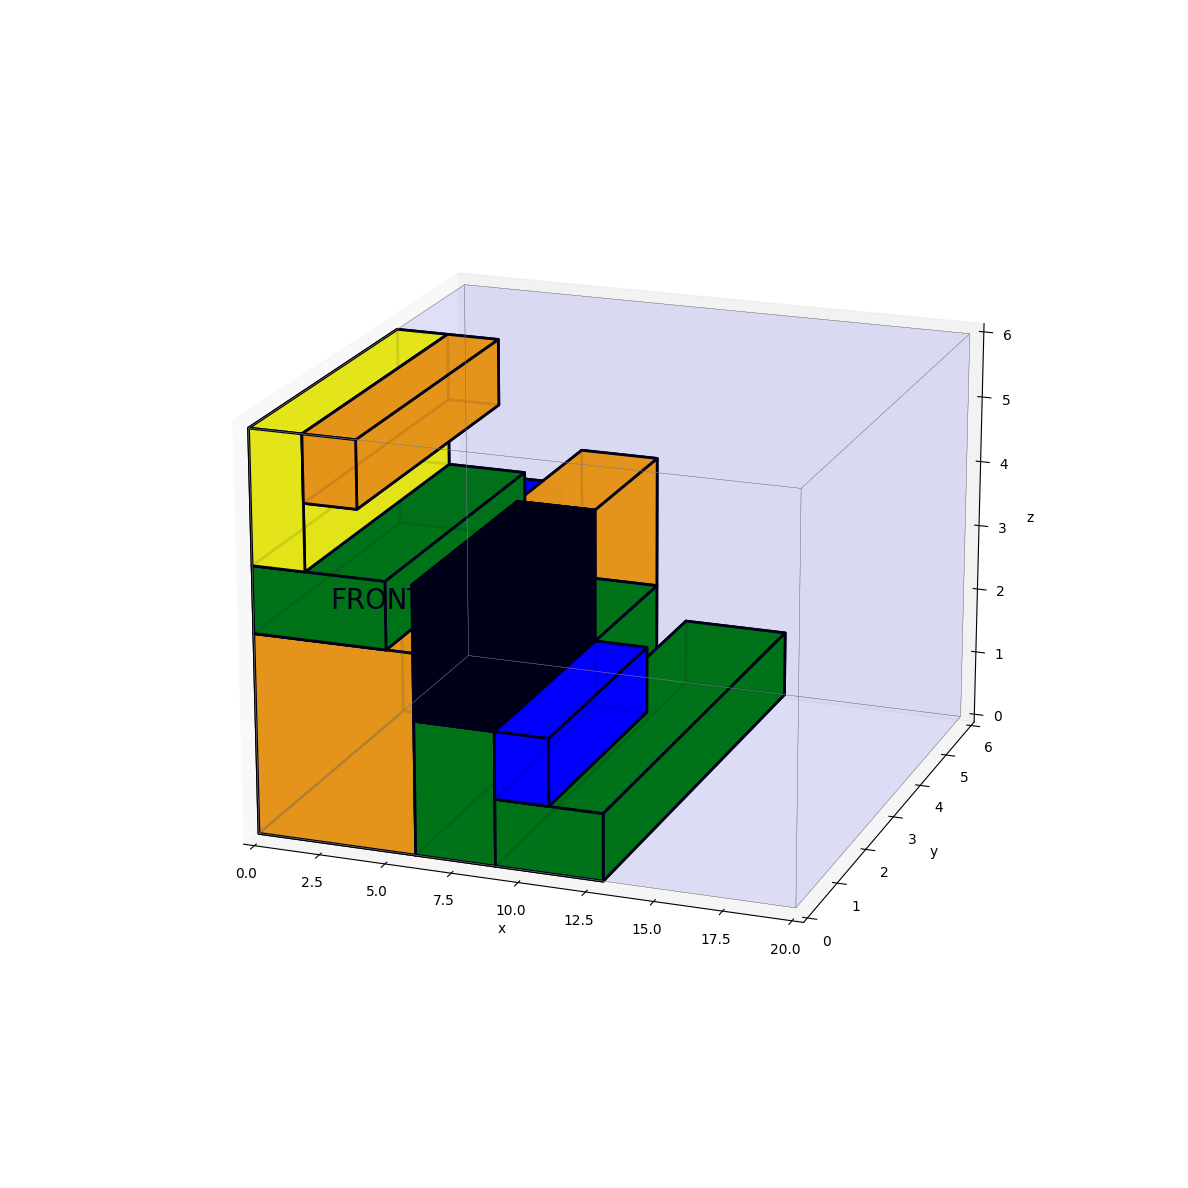

In [66]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from itertools import product
%matplotlib inline
%matplotlib nbagg
from matplotlib import cm

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

# create list of corners
#z = list(product([-1,1], repeat=3))

FLB=(0,0,0)
FLT=(0,0,H)
FRT=(0,W,H)
FRB=(0,W,0)

RLB=(L,0,0)
RLT=(L,0,H)
RRT=(L,W,H)
RRB=(L,W,0)

verts=[  [FLB,FLT,FRT,FRB], [FLB,FLT,RLT,RLB],[FLT,FRT,RRT,RLT],[RRT,FRT,FRB,RRB],[RLB,FLB,FRB,RRB],[RLB,RLT,RRT,RRB]

]
ax.set_xlim3d(0,L)
ax.set_ylim3d(0,W)
ax.set_zlim3d(0,H)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.grid(False)
# plot sides
ax.add_collection3d(Poly3DCollection(verts,facecolors='blue', linewidths=0.25, edgecolors='grey', alpha=.05))



# set verts connectors
#verts = [[z[0],z[1],z[5],z[4]], [z[4],z[6],z[7],z[5]], [z[7], z[6], z[2], z[3]], [z[2], z[0], z[1], z[3]],
 #        [z[5], z[7], z[3], z[1]], [z[0], z[2], z[6], z[4]]]



c=['red','green','blue','yellow','orange','black']
for i in I:
    flb[i]=(x[i],y[i],z[i])
    flt[i]=(x[i],y[i],z[i]+h[i])
    frt[i]=(x[i],y[i]+w[i],z[i]+h[i])
    frb[i]=(x[i],y[i]+w[i],z[i])

    rlb[i]=(x[i]+l[i],y[i],z[i])
    rlt[i]=(x[i]+l[i],y[i],z[i]+h[i])
    rrt[i]=(x[i]+l[i],y[i]+w[i],z[i]+h[i])
    rrb[i]=(x[i]+l[i],y[i]+w[i],z[i])

    q=[  [flb[i],flt[i],frt[i],frb[i]],
            [flb[i],flt[i],rlt[i],rlb[i]],
            [flt[i],frt[i],rrt[i],rlt[i]],
            [rrt[i],frt[i],frb[i],rrb[i]],
            [rlb[i],flb[i],frb[i],rrb[i]],
            [rlb[i],rlt[i],rrt[i],rrb[i]]
            ]

    color=random.choice(c)
    ax.add_collection3d(Poly3DCollection(q,facecolors=color, linewidths=2, edgecolors='black', alpha=0.9))




label1 = "FRONT"
#label2 = "REAR"
#label3 = "BOTTOM"
ax.text(0, 2, 2.5, '%s' % (label1), size=20,zorder=7, color='black')
#ax.text(12, 2, 2.5, '%s' % (label2), size=20,zorder=10, color='blue')
#ax.text(6, 2, 0, '%s' % (label3), size=20,zorder=5, color='blue')
#ax.view_init(elev=0, azim=45)
plt.show()

In [1070]:
MPL = 0
for i in I:

    p_feasible=[]
    sa_ratio=0
    for p in P:
        print('This is P ',p)
        if stack_p[p]==1:

            if p[0]+l[i] <=L and p[1]+w[i]<=W and p[2]+h[i]<=H:
                print('This is p[0]: ',p[0])
                print("second level worked")
                #if sa_p[p]>sa[i]:
                if l[i]<=l_available[p] and w[i]<=w_available[p]:
                    print('third level worked')
                    if sa[i]/sa_p[p]>=sa_ratio:
                        print("sa/sa_p worked")
                        sa_ratio=sa[i]/sa_p[p]
                        p_feasible.append(p)
                        print(sa_ratio, p_feasible)

    if p_feasible==[]:
        I_retry.append(i)
        break

    if len(p_feasible)>1:
        x_p= min([point[0] for point in p_feasible])
        p_best=[ x for x in p_feasible if x[0]==x_p][0]

    if len(p_feasible)==1:
        p_best=p_feasible[0]

#item to be placed at x[i],y[i],z[i]
    x[i]=p_best[0]
    y[i]=p_best[1]
    z[i]=p_best[2]

    P.append((x[i]+l[i],y[i],z[i]))
    P.append((x[i],y[i]+w[i],z[i]))
    P.append((x[i],y[i],z[i]+h[i]))
    sa_p[(x[i]+l[i],y[i],z[i])]=sa_p[p_best]-sa[i]
    sa_p[(x[i],y[i]+w[i],z[i])]=sa_p[p_best]-sa[i]
    sa_p[(x[i],y[i],z[i]+h[i])]=sa[i]

    under_p[(x[i]+l[i],y[i],z[i])]=under_p[p_best]
    under_p[(x[i],y[i]+w[i],z[i])]=under_p[p_best]
    under_p[(x[i],y[i],z[i]+h[i])]=i

    stack_p[(x[i]+l[i],y[i],z[i])]=stack_p[p_best]
    stack_p[(x[i],y[i]+w[i],z[i])]=stack_p[p_best]
    stack_p[(x[i],y[i],z[i]+h[i])]=stack[i]


    l_available[(x[i]+l[i],y[i],z[i])]=l_available[p_best]-l[i]
    l_available[(x[i],y[i]+w[i],z[i])]=l_available[p_best]
    l_available[(x[i],y[i],z[i]+h[i])]=l[i]

    w_available[(x[i]+l[i],y[i],z[i])]=w_available[p_best]
    w_available[(x[i],y[i]+w[i],z[i])]=w_available[p_best]-w[i]
    w_available[(x[i],y[i],z[i]+h[i])]=w[i]

    P.remove(p_best)

    if l_available[(x[i]+l[i],y[i],z[i])]==0:
        P.remove((x[i]+l[i],y[i],z[i]))
    if w_available[(x[i],y[i]+w[i],z[i])]==0:
        P.remove((x[i],y[i]+w[i],z[i]))

    for pp, t1 in enumerate(P):
        for t2 in P[pp+1:]:
            if t1[1:]==t2[1:]:
                if t1[0]<t2[0]:
                    P.remove(t2)
                else:
                    P.remove(t1)
    for ppp, tt1 in enumerate(P):
        for tt2 in P[ppp+1:]:
            if tt1[0::2]==tt2[0::2]:
                if tt1[1]<tt2[1]:
                    P.remove(tt2)
                else:
                    P.remove(tt1)

    IP.append(i)
    MPL= max([x[i]+l[i] for i in IP])











[[(0, 0, 5), (0, 0, 6), (0, 3, 6), (0, 3, 5)],
 [(0, 0, 5), (0, 0, 6), (2, 0, 6), (2, 0, 5)],
 [(0, 0, 6), (0, 3, 6), (2, 3, 6), (2, 0, 6)],
 [(2, 3, 6), (0, 3, 6), (0, 3, 5), (2, 3, 5)],
 [(2, 0, 5), (0, 0, 5), (0, 3, 5), (2, 3, 5)],
 [(2, 0, 5), (2, 0, 6), (2, 3, 6), (2, 3, 5)]]

In [1048]:
x,y,z

({7: 0, 1: 0, 2: 6, 5: 6, 4: 12, 6: 8, 3: 6, 8: 16, 9: 18, 10: 0},
 {7: 0, 1: 0, 2: 0, 5: 0, 4: 0, 6: 0, 3: 0, 8: 0, 9: 0, 10: 0},
 {7: 0, 1: 3, 2: 0, 5: 1, 4: 0, 6: 1, 3: 4, 8: 0, 9: 0, 10: 5})

In [1050]:
l,w,h

({7: 6, 1: 5, 2: 6, 5: 2, 4: 4, 6: 3, 3: 2, 8: 2, 9: 2, 10: 2, 0: 20},
 {7: 4, 1: 3, 2: 4, 5: 4, 4: 5, 6: 3, 3: 4, 8: 3, 9: 4, 10: 3, 0: 6},
 {7: 3, 1: 2, 2: 1, 5: 3, 4: 1, 6: 2, 3: 2, 8: 2, 9: 1, 10: 1, 0: 6})

In [1035]:




FLB1=(7,1,4)
FLT1=(7,1,4+h[1])
FRT1=(7,1+w[1],4+h[1])
FRB1=(7,1+w[1],4)

RLB1=(7+l[1],1,4)
RLT1=(7+l[1],1,4+h[1])
RRT1=(7+l[1],1+w[1],4+h[1])
RRB1=(7+l[1],1+w[1],4)

# set verts connectors
#verts = [[z[0],z[1],z[5],z[4]], [z[4],z[6],z[7],z[5]], [z[7], z[6], z[2], z[3]], [z[2], z[0], z[1], z[3]],
 #        [z[5], z[7], z[3], z[1]], [z[0], z[2], z[6], z[4]]]

verts1=[  [FLB1,FLT1,FRT1,FRB1], [FLB1,FLT1,RLT1,RLB1],[FLT1,FRT1,RRT1,RLT1],[RRT1,FRT1,FRB1,RRB1],[RLB1,FLB1,FRB1,RRB1],[RLB1,RLT1,RRT1,RRB1]

]

FLB2=(0,0,0)
FLT2=(0,0,0+w[2])
FRT2=(0,0+h[2],0+w[2])
FRB2=(0,0+h[2],0)

RLB2=(0+l[2],0,0)
RLT2=(0+l[2],0,0+w[2])
RRT2=(0+l[2],0+h[2],0+w[2])
RRB2=(0+l[2],0+h[2],0)



FLB3=(3,1,4)
FLT3=(3,1,4+h[3])
FRT3=(3,1+w[3],4+h[3])
FRB3=(3,1+w[3],4)

RLB3=(3+l[3],1,4)
RLT3=(3+l[3],1,4+h[3])
RRT3=(3+l[3],1+w[3],4+h[3])
RRB3=(3+l[3],1+w[3],4)


# set verts connectors
#verts = [[z[0],z[1],z[5],z[4]], [z[4],z[6],z[7],z[5]], [z[7], z[6], z[2], z[3]], [z[2], z[0], z[1], z[3]],
 #        [z[5], z[7], z[3], z[1]], [z[0], z[2], z[6], z[4]]]


verts2=[  [FLB2,FLT2,FRT2,FRB2], [FLB2,FLT2,RLT2,RLB2],[FLT2,FRT2,RRT2,RLT2],[RRT2,FRT2,FRB2,RRB2],[RLB2,FLB2,FRB2,RRB2],[RLB2,RLT2,RRT2,RRB2]]
verts3=[  [FLB3,FLT3,FRT3,FRB3], [FLB3,FLT3,RLT3,RLB3],[FLT3,FRT3,RRT3,RLT3],[RRT3,FRT3,FRB3,RRB3],[RLB3,FLB3,FRB3,RRB3],[RLB3,RLT3,RRT3,RRB3]]


FLB4=(6,0,1)
FLT4=(6,0,1+l[4])
FRT4=(6,0+w[4],1+l[4])
FRB4=(6,0+w[4],1)

RLB4=(6+h[4],0,1)
RLT4=(6+h[4],0,1+l[4])
RRT4=(6+h[4],0+w[4],1+l[4])
RRB4=(6+h[4],0+w[4],1)

verts4=[  [FLB4,FLT4,FRT4,FRB4], [FLB4,FLT4,RLT4,RLB4],[FLT4,FRT4,RRT4,RLT4],[RRT4,FRT4,FRB4,RRB4],[RLB4,FLB4,FRB4,RRB4],[RLB4,RLT4,RRT4,RRB4]]


FLB5=(8,1,2)
FLT5=(8,1,2+w[5])
FRT5=(8,1+h[5],2+w[5])
FRB5=(8,1+h[5],2)

RLB5=(8+l[5],1,2)
RLT5=(8+l[5],1,2+w[5])
RRT5=(8+l[5],1+h[5],2+w[5])
RRB5=(8+l[5],1+h[5],2)

verts5=[  [FLB5,FLT5,FRT5,FRB5], [FLB5,FLT5,RLT5,RLB5],[FLT5,FRT5,RRT5,RLT5],[RRT5,FRT5,FRB5,RRB5],[RLB5,FLB5,FRB5,RRB5],[RLB5,RLT5,RRT5,RRB5]]

FLB6=(0,1,4)
FLT6=(0,1,4+h[6])
FRT6=(0,1+l[6],4+h[6])
FRB6=(0,1+l[6],4)

RLB6=(0+w[6],1,4)
RLT6=(0+w[6],1,4+h[6])
RRT6=(0+w[6],1+l[6],4+h[6])
RRB6=(0+w[6],1+l[6],4)

verts6=[  [FLB6,FLT6,FRT6,FRB6], [FLB6,FLT6,RLT6,RLB6],[FLT6,FRT6,RRT6,RLT6],[RRT6,FRT6,FRB6,RRB6],[RLB6,FLB6,FRB6,RRB6],[RLB6,RLT6,RRT6,RRB6]]


FLB7=(0,1,0)
FLT7=(0,1,0+w[7])
FRT7=(0,1+h[7],0+w[7])
FRB7=(0,1+h[7],0)

RLB7=(0+l[7],1,0)
RLT7=(0+l[7],1,0+w[7])
RRT7=(0+l[7],1+h[7],0+w[7])
RRB7=(0+l[7],1+h[7],0)

verts7=[  [FLB7,FLT7,FRT7,FRB7], [FLB7,FLT7,RLT7,RLB7],[FLT7,FRT7,RRT7,RLT7],[RRT7,FRT7,FRB7,RRB7],[RLB7,FLB7,FRB7,RRB7],[RLB7,RLT7,RRT7,RRB7]]


FLB8=(8,1,0)
FLT8=(8,1,0+h[8])
FRT8=(8,1+w[8],0+h[8])
FRB8=(8,1+w[8],0)

RLB8=(8+l[8],1,0)
RLT8=(8+l[8],1,0+h[8])
RRT8=(8+l[8],1+w[8],0+h[8])
RRB8=(8+l[8],1+w[8],0)




verts8=[  [FLB8,FLT8,FRT8,FRB8], [FLB8,FLT8,RLT8,RLB8],[FLT8,FRT8,RRT8,RLT8],[RRT8,FRT8,FRB8,RRB8],[RLB8,FLB8,FRB8,RRB8],[RLB8,RLT8,RRT8,RRB8]]


FLB9=(3,3,4)
FLT9=(3,3,4+w[9])
FRT9=(3,3+h[9],4+w[9])
FRB9=(3,3+h[9],4)

RLB9=(8+l[9],3,4)
RLT9=(8+l[9],3,4+w[9])
RRT9=(8+l[9],3+h[9],4+w[9])
RRB9=(8+l[9],3+h[9],4)



# set verts connectors
#verts = [[z[0],z[1],z[5],z[4]], [z[4],z[6],z[7],z[5]], [z[7], z[6], z[2], z[3]], [z[2], z[0], z[1], z[3]],
 #        [z[5], z[7], z[3], z[1]], [z[0], z[2], z[6], z[4]]]

verts9=[  [FLB9,FLT9,FRT9,FRB9], [FLB9,FLT9,RLT9,RLB9],[FLT9,FRT9,RRT9,RLT9],[RRT9,FRT9,FRB9,RRB9],[RLB9,FLB9,FRB9,RRB9],[RLB9,RLT9,RRT9,RRB9]

]

FLB10=(7,2,0)
FLT10=(7,2,0+l[10])
FRT10=(7,2+h[10],0+l[10])
FRB10=(7,2+h[10],0)

RLB10=(7+w[10],2,0)
RLT10=(7+w[10],2,0+l[10])
RRT10=(7+w[10],2+h[10],0+l[10])
RRB10=(7+w[10],2+h[10],0)

verts10=[  [FLB10,FLT10,FRT10,FRB10], [FLB10,FLT10,RLT10,RLB10],[FLT10,FRT10,RRT10,RLT10],[RRT10,FRT10,FRB10,RRB10],[RLB10,FLB10,FRB10,RRB10],[RLB10,RLT10,RRT10,RRB10]]



In [708]:
stack_p

{(0, 0, 0): 1,
 (6, 0, 0): 1,
 (0, 4, 0): 1,
 (0, 0, 3): 1,
 (5, 0, 3): 1,
 (0, 3, 3): 1,
 (0, 0, 5): 1,
 (12, 0, 0): 1,
 (6, 4, 0): 1,
 (6, 0, 1): 1}

In [329]:
w

{7: 4, 1: 3, 2: 4, 5: 4, 4: 5, 6: 3, 3: 4, 8: 3, 9: 4, 10: 3, 0: 6}

In [330]:
h

{7: 3, 1: 2, 2: 1, 5: 3, 4: 1, 6: 2, 3: 2, 8: 2, 9: 1, 10: 1, 0: 6}

In [331]:
x

{7: 0, 1: 6, 2: 0}

In [151]:
MPL = 0
for i in I[2:3]:



    p_feasible=[]
    sa_ratio=0
    for p in P:
        if stack_p[p]==1:
            if p[0]+l[i] <=L and p[1]+w[i]<=W and p[2]+h[i]<=H:
                #if sa_p[p]>sa[i]:
                if p[0]+l[i]<=l_available[p] and p[1]+w[i]<=w_available[p]:
                    if sa[i]/sa_p[p]>=sa_ratio:
                        sa_ratio=sa_p[p]/sa[i]
                        p_feasible.append(p)

    if p_feasible==[]:
        I_retry.append(i)

    if len(p_feasible)>1:
        x_p= min([point[0] for point in p_feasible])
        p_best=[ x for x in p_feasible if x[0]==x_p][0]

    if len(p_feasible)==1:
        p_best=p_feasible[0]

#item to be placed at x[i],y[i],z[i]
    x[i]=p_best[0]
    y[i]=p_best[1]
    z[i]=p_best[2]

    P.append((x[i]+l[i],y[i],z[i]))
    P.append((x[i],y[i]+w[i],z[i]))
    P.append((x[i],y[i],z[i]+h[i]))
    sa_p[(x[i]+l[i],y[i],z[i])]=sa_p[p_best]-sa[i]
    sa_p[(x[i],y[i]+w[i],z[i])]=sa_p[p_best]-sa[i]
    sa_p[(x[i],y[i],z[i]+h[i])]=sa[i]

    under_p[(x[i]+l[i],y[i],z[i])]=under_p[p_best]
    under_p[(x[i],y[i]+w[i],z[i])]=under_p[p_best]
    under_p[(x[i],y[i],z[i]+h[i])]=i

    stack_p[(x[i]+l[i],y[i],z[i])]=stack_p[p_best]
    stack_p[(x[i],y[i]+w[i],z[i])]=stack_p[p_best]
    stack_p[(x[i],y[i],z[i]+h[i])]=stack[i]


    l_available[(x[i]+l[i],y[i],z[i])]=l[under_p[(x[i]+l[i],y[i],z[i])]]-l[i]
    l_available[(x[i],y[i]+w[i],z[i])]=l[under_p[(x[i],y[i]+w[i],z[i])]]
    l_available[(x[i],y[i],z[i]+h[i])]=l[i]

    w_available[(x[i]+l[i],y[i],z[i])]=w[under_p[(x[i]+l[i],y[i],z[i])]]
    w_available[(x[i],y[i]+w[i],z[i])]=w[under_p[(x[i],y[i]+w[i],z[i])]]-w[i]
    w_available[(x[i],y[i],z[i]+h[i])]=w[i]

    P.remove(p_best)

    IP.append(i)
    MPL= max([x[i]+l[i] for i in IP])
"""
    if z[i]==0:
        P.append((x[i]+l[i],y[i],0))
        P.append((x[i],y[i]+w[i],0))
        P.append((x[i],y[i],h[i]))
        sa_p[(x[i]+l[i],y[i],0)]=sa_p[p_best]-sa[i]
        sa_p[(x[i],y[i]+w[i],0)]=sa_p[p_best]-sa[i]
        sa_p[(x[i],y[i],h[i])]=sa[i]

        under_p[(x[i]+l[i],y[i],0)]=0
        under_p[(x[i],y[i]+w[i],0)]=0
        under_p[(x[i],y[i],h[i])]=i

        stack_p[(x[i]+l[i],y[i],0)]=1
        stack_p[(x[i],y[i]+w[i],0)]=1
        stack_p[(x[i],y[i],h[i])]=stack[i]

        l_available[(x[i]+l[i],y[i],0)]=l[under_p[(x[i]+l[i],y[i],0)]]-l[i]
        l_available[(x[i],y[i]+w[i],0)]=l[under_p[(x[i],y[i]+w[i],0)]
        l_available[(x[i],y[i],h[i])]=l[i]

        w_available[(x[i]+l[i],y[i],0)]=w[under_p[(x[i]+l[i],y[i],0)]]
        w_available[(x[i],y[i]+w[i],0)]=w[under_p[(x[i],y[i]+w[i],z[i])]]-w[i]
        w_available[(x[i],y[i],h[i])]=w[i]

"""
#    else:

(6, 0, 0)

In [191]:
#find PP:

if z[i]==0:
    P.append((x[i]+l[i],y[i],0))
    P.append((x[i],y[i]+w[i],0))
    sa_p[(x[i]+l[i],y[i],0)]=sa_p[p_best]-sa[i]
    sa_p[(x[i],y[i]+w[i],0)]=sa_p[p_best]-sa[i]

else:
    for j in reversed(IP):

        if x[j]<x[i]+l[i] and y[j]<y[i]+w[i] and x[j]+l[j]>x[i]+l[i] and y[j]+w[j]>y[i]:
            if z[j]+h[j]<=z[i] and z[j]+h[j]>MPH_x:
                MPH_x=z[j]+h[j]

        if x[j]<x[i]+l[i] and y[j]<y[i]+w[i] and x[j]+l[j]>x[i] and y[j]>y[i]+w[i]:
            if z[j]+h[j]<=z[i] and z[j]+h[j]>MPH_y:
                MPH_y=z[j]+h[j]

        if MPH_x==z[i] and MPH_y==z[i]:
            break

        P.append((x[i]+l[i],y[i],MPH_x),(x[i],y[i]+w[i],MPH_y)
        #if MPH_x== z[j]+h[j]:
            #sa_p[(x[i]+l[i],y[i],MPH_x)]=sa[j]-sa[i]
        #if MPH_y== z[j]+h[j]:
           # sa_p[(x[i],y[i]+w[i],MPH_y)]=sa[j]-sa[i]


P.append((x[i],y[i],z[i]+h[i]))
sa_p[(x[i],y[i],z[i]+h[i])]=sa[i]

if MPL != 0:
    if x[i]+l[i]>MPL:
        P.remove((MPL,0,0))
        MPL=x[i]+l[i]
        P.append((MPL,0,0))

        box_on_floor_sa=0
        for key in sa_p.keys():
            if key[2]==0:
                box_on_floor_sa=box_on_floor_sa+sa_p[key]

        sa_p[(MPL,0,0)]=L*W-box_on_floor_sa


P.remove(x[i],y[i],z[i])


6

In [165]:
MPL = 0
for i in I:

    MPH_x=0
    MPH_y=0

    p_best=[]
    sa_ratio=1
    for p in P:
        if stack[p]==1:
            if p[0]+l[i] <=L and p[1]+w[i]<=W and p[2]+h[i]<=H:
                if sa_p[p]>sa[i]:
                    if sa_p[p]/sa[i]>=sa_ratio:
                        sa_ratio=sa_p[p]/sa[i]
                        p_best.append(p)

    if p_best==[]:
        I_retry.append(i)

    if len(p_best)>1:
        x_p= min([point[0] for point in p_best])
        p_best=[ x for x in p_best if x[0]==x_p]

    x[i]=p_best[0][0]
    y[i]=p_best[0][1]
    z[i]=p_best[0][2]



            if p[1]==0 and p[2]==0:


            #feasibility check
            if sa_p[p]/sa[i]>=sa_ratio:
                sa_ratio=sa_p[p]/sa[i]
                p_best.append(p)



    if z[i]==0:
        P.append((x[i]+l[i],y[i],0),(x[i],y[i]+w[i],0))
        sa_p[(x[i]+l[i],y[i],0)]=sa_p[p]-sa[i]
        sa_p[(x[i],y[i]+w[i],0)]=sa_p[p]-sa[i]

    else:
        for j in reversed(IP):

            if x[j]<x[i]+l[i] and y[j]<y[i]+w[i] and x[j]+l[j]>x[i]+l[i] and y[j]+w[j]>y[i]:
                if z[j]+h[j]<=z[i] and z[j]+h[j]>MPH_x:
                    MPH_x=z[j]+h[j]

            if x[j]<x[i]+l[i] and y[j]<y[i]+w[i] and x[j]+l[j]>x[i] and y[j]>y[i]+w[i]:
                if z[j]+h[j]<=z[i] and z[j]+h[j]>MPH_y:
                    MPH_y=z[j]+h[j]

            if MPH_x==z[i] and MPH_y==z[i]:
                break

            P.append((x[i]+l[i],y[i],MPH_x),(x[i],y[i]+w[i],MPH_y)
            #if MPH_x== z[j]+h[j]:
                #sa_p[(x[i]+l[i],y[i],MPH_x)]=sa[j]-sa[i]
            #if MPH_y== z[j]+h[j]:
               # sa_p[(x[i],y[i]+w[i],MPH_y)]=sa[j]-sa[i]


    P.append((x[i],y[i],z[i]+h[i]))
    sa_p[(x[i],y[i],z[i]+h[i])]=sa[i]

    if MPL != 0:
        if x[i]+l[i]>MPL:
            P.remove((MPL,0,0))
            MPL=x[i]+l[i]
            P.append((MPL,0,0))

            box_on_floor_sa=0
            for key in sa_p.keys():
                if key[2]==0:
                    box_on_floor_sa=box_on_floor_sa+sa_p[key]

            sa_p[(MPL,0,0)]=L*W-box_on_floor_sa


    P.remove(x[i],y[i],z[i])

    IP.append(i)
    MPL= max([x[i]+l[i] for i in IP)



SyntaxError: invalid syntax (Temp/ipykernel_920/2771475259.py, line 10)

In [ ]:
for i in I[:1]:



    j_best=[]
    for j in P:
        if o[i]==orientations[0]:
            x_dim=j[0]+l[i]
            y_dim=j[1]+w[i]
            z_dim=j[2]+h[i]

        if o[i]==orientations[1]:
            x_dim=j[0]+w[i]
            y_dim=j[1]+l[i]
            z_dim=j[2]+h[i]

        if ((x_dim<=L) and (y_dim<=W) and (z_dim<=H)):

        #underlying surface area associated with each PP


        #cantilever

            #if j>j_best:
            j_best.append(j)

        if j_best!=[]:
            P.remove(j)

            flb[i]=(j[0],j[0],j[0])
            flt[i]=(j[0],j[0],j[0]+z_dim)
            frt[i]=(j[0],j[0]+y_dim,j[0]+z_dim)
            frb[i]=(j[0],j[0]+y_dim,j[0])

            rlb[i]=(j[0]+x_dim,j[0],j[0])
            rlt[i]=(j[0]+x_dim,j[0],j[0]+z_dim)
            rrt[i]=(j[0]+x_dim,j[0]+y_dim,j[0]+z_dim)
            rrb[i]=(j[0]+x_dim,j[0]+y_dim,j[0])

            P.append(flt[i])
            P.append(frb[i])
            P.append(rlb[i])
    print(P)

In [81]:
flt[1]

(0, 0, 2)

In [60]:
frb

{1: (0, 3, 0)}

In [49]:
x_position = FLB[0]+l[1]
y_position =FLB[1]+w[1]
z_position =FLB[2]+h[1]

In [ ]:
FLB1=(p[0][0],p[0][0],4)
FLT1=(7,1,4+h[1])
FRT1=(7,1+w[1],4+h[1])
FRB1=(7,1+w[1],4)

RLB1=(7+l[1],1,4)
RLT1=(7+l[1],1,4+h[1])
RRT1=(7+l[1],1+w[1],4+h[1])
RRB1=(7+l[1],1+w[1],4)


In [23]:
# GUROBI


In [24]:
model=gp.Model()

Set parameter Username
Academic license - for non-commercial use only - expires 2023-01-12


In [205]:
t=model.addVars(I, vtype=GRB.BINARY, name='t')

x=model.addVars(I,lb=0, vtype=GRB.CONTINUOUS, name='x')
y=model.addVars(I,lb=0,vtype=GRB.CONTINUOUS, name='y')
z=model.addVars(I,lb=0,vtype=GRB.CONTINUOUS, name='z')

o1=model.addVars(I, vtype=GRB.BINARY, name='o1')
o2=model.addVars(I, vtype=GRB.BINARY, name='o2')
o3=model.addVars(I, vtype=GRB.BINARY, name='o3')
o4=model.addVars(I, vtype=GRB.BINARY, name='o4')
o5=model.addVars(I, vtype=GRB.BINARY, name='o5')
o6=model.addVars(I, vtype=GRB.BINARY, name='o6')

f=model.addVars(pair, vtype=GRB.BINARY, name='f')
b=model.addVars(pair, vtype=GRB.BINARY, name='b')
u=model.addVars(pair, vtype=GRB.BINARY, name='u')


In [206]:
pair

[(1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (2, 1),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (3, 1),
 (3, 2),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (3, 10),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (4, 10),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (5, 10),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 7),
 (6, 8),
 (6, 9),
 (6, 10),
 (7, 1),
 (7, 2),
 (7, 3),
 (7, 4),
 (7, 5),
 (7, 6),
 (7, 8),
 (7, 9),
 (7, 10),
 (8, 1),
 (8, 2),
 (8, 3),
 (8, 4),
 (8, 5),
 (8, 6),
 (8, 7),
 (8, 9),
 (8, 10),
 (9, 1),
 (9, 2),
 (9, 3),
 (9, 4),
 (9, 5),
 (9, 6),
 (9, 7),
 (9, 8),
 (9, 10),
 (10, 1),
 (10, 2),
 (10, 3),
 (10, 4),
 (10, 5),
 (10, 6),
 (10, 7),
 (10, 8),
 (10, 9)]

In [207]:
w

{1: 3, 2: 4, 3: 2, 4: 4, 5: 2, 6: 3, 7: 4, 8: 2, 9: 2, 10: 2}

In [208]:
obj=gp.quicksum(pi[i]*t[i] for i in I)
model.setObjective(obj, GRB.MAXIMIZE)

In [209]:
for i in I:
    for j in I:
        if i<j:
            model.addConstr(f[i,j]+f[j,i]+b[i,j]+b[j,i]+u[i,j]+u[j,i]+(1-t[i])+(1-t[j])>=1)

In [210]:
L

12

In [211]:

for (i,j) in pair:
    model.addConstr(x[i]+w[i]*(o2[i]+o4[i])+l[i]*(o1[i]+o6[i])+h[i]*(o3[i]+o5[i])-x[j]<=L*(1-b[i,j]))
    model.addConstr(y[i]+w[i]*(o1[i]+o3[i])+l[i]*(o2[i]+o5[i])+h[i]*(o4[i]+o6[i])-y[j]<=W*(1-f[i,j]))
    model.addConstr(z[i]+w[i]*(o5[i]+o6[i])+l[i]*(o3[i]+o4[i])+h[i]*(o1[i]+o2[i])-z[j]<=H*(1-u[i,j]))

"""

for (i,j) in pair:
    model.addConstr(x[i]+w[i]*(o2[i])+l[i]*(o1[i]])-x[j]<=L*(1-b[i,j]))
    model.addConstr(y[i]+w[i]*(o1[i])+l[i]*(o2[i])-y[j]<=W*(1-f[i,j]))
    model.addConstr(z[i]+w[i]*(o6[i])+h[i]*(o1[i]+o2[i])-z[j]<=H*(1-u[i,j]))
"""

'\n\nfor (i,j) in pair:\n    model.addConstr(x[i]+w[i]*(o2[i])+l[i]*(o1[i]])-x[j]<=L*(1-b[i,j]))\n    model.addConstr(y[i]+w[i]*(o1[i])+l[i]*(o2[i])-y[j]<=W*(1-f[i,j]))\n    model.addConstr(z[i]+w[i]*(o6[i])+h[i]*(o1[i]+o2[i])-z[j]<=H*(1-u[i,j]))\n'

In [212]:
for i in I:
    model.addConstr(x[i]+w[i]*(o2[i]+o4[i])+l[i]*(o1[i]+o6[i])+h[i]*(o3[i]+o5[i])<=L)
    model.addConstr(y[i]+w[i]*(o1[i]+o3[i])+l[i]*(o2[i]+o5[i])+h[i]*(o4[i]+o6[i])<=W)
    model.addConstr(z[i]+w[i]*(o5[i]+o6[i])+l[i]*(o3[i]+o4[i])+h[i]*(o1[i]+o2[i])<=H)

In [213]:
for i in I:
    model.addConstr(o1[i]+o2[i]+o3[i]+o4[i]+o5[i]+o6[i] ==1)

In [214]:
model.update()
model.optimize()

Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 355 rows, 370 columns and 3060 nonzeros
Model fingerprint: 0xbfb0733f
Variable types: 30 continuous, 340 integer (340 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [2e+02, 1e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+01]
Found heuristic solution: objective 991.0000000
Presolve removed 10 rows and 27 columns
Presolve time: 0.03s
Presolved: 345 rows, 343 columns, 2002 nonzeros
Variable types: 30 continuous, 313 integer (313 binary)

Root relaxation: objective 4.930000e+03, 115 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

H    0     0                    4930.0000000 4930.00000  0.00%     -    0s
     0     0 4930.00000    0    

In [215]:
L,W,H

(12, 4, 6)

In [216]:
items

,item,length,height,width,volume,value
0,1,5,2,3,30,991
1,2,6,1,4,24,324
2,3,4,2,2,16,280
3,4,5,1,4,20,387
4,5,4,3,2,24,273
5,6,3,2,3,18,869
6,7,6,3,4,72,387
7,8,3,2,2,12,628
8,9,4,1,2,8,238
9,10,3,1,2,6,553


In [217]:
x

{1: <gurobi.Var x[1] (value 7.0)>,
 2: <gurobi.Var x[2] (value 0.0)>,
 3: <gurobi.Var x[3] (value 3.0)>,
 4: <gurobi.Var x[4] (value 6.0)>,
 5: <gurobi.Var x[5] (value 8.0)>,
 6: <gurobi.Var x[6] (value 0.0)>,
 7: <gurobi.Var x[7] (value 0.0)>,
 8: <gurobi.Var x[8] (value 8.0)>,
 9: <gurobi.Var x[9] (value 3.0)>,
 10: <gurobi.Var x[10] (value 7.0)>}

In [218]:
y

{1: <gurobi.Var y[1] (value 1.0)>,
 2: <gurobi.Var y[2] (value 0.0)>,
 3: <gurobi.Var y[3] (value 1.0)>,
 4: <gurobi.Var y[4] (value 0.0)>,
 5: <gurobi.Var y[5] (value 1.0)>,
 6: <gurobi.Var y[6] (value 1.0)>,
 7: <gurobi.Var y[7] (value 1.0)>,
 8: <gurobi.Var y[8] (value 1.0)>,
 9: <gurobi.Var y[9] (value 3.0)>,
 10: <gurobi.Var y[10] (value 2.0)>}

In [219]:
z

{1: <gurobi.Var z[1] (value 4.0)>,
 2: <gurobi.Var z[2] (value 0.0)>,
 3: <gurobi.Var z[3] (value 4.0)>,
 4: <gurobi.Var z[4] (value 1.0)>,
 5: <gurobi.Var z[5] (value 2.0)>,
 6: <gurobi.Var z[6] (value 4.0)>,
 7: <gurobi.Var z[7] (value 0.0)>,
 8: <gurobi.Var z[8] (value 0.0)>,
 9: <gurobi.Var z[9] (value 4.0)>,
 10: <gurobi.Var z[10] (value 0.0)>}

In [220]:
o1

{1: <gurobi.Var o1[1] (value 1.0)>,
 2: <gurobi.Var o1[2] (value 0.0)>,
 3: <gurobi.Var o1[3] (value 1.0)>,
 4: <gurobi.Var o1[4] (value 0.0)>,
 5: <gurobi.Var o1[5] (value 0.0)>,
 6: <gurobi.Var o1[6] (value 0.0)>,
 7: <gurobi.Var o1[7] (value 0.0)>,
 8: <gurobi.Var o1[8] (value 1.0)>,
 9: <gurobi.Var o1[9] (value 0.0)>,
 10: <gurobi.Var o1[10] (value 0.0)>}

In [221]:
o2

{1: <gurobi.Var o2[1] (value 0.0)>,
 2: <gurobi.Var o2[2] (value 0.0)>,
 3: <gurobi.Var o2[3] (value 0.0)>,
 4: <gurobi.Var o2[4] (value 0.0)>,
 5: <gurobi.Var o2[5] (value 0.0)>,
 6: <gurobi.Var o2[6] (value 1.0)>,
 7: <gurobi.Var o2[7] (value 0.0)>,
 8: <gurobi.Var o2[8] (value 0.0)>,
 9: <gurobi.Var o2[9] (value 0.0)>,
 10: <gurobi.Var o2[10] (value 0.0)>}

In [222]:
o3

{1: <gurobi.Var o3[1] (value 0.0)>,
 2: <gurobi.Var o3[2] (value 0.0)>,
 3: <gurobi.Var o3[3] (value 0.0)>,
 4: <gurobi.Var o3[4] (value 0.0)>,
 5: <gurobi.Var o3[5] (value 0.0)>,
 6: <gurobi.Var o3[6] (value 0.0)>,
 7: <gurobi.Var o3[7] (value 0.0)>,
 8: <gurobi.Var o3[8] (value 0.0)>,
 9: <gurobi.Var o3[9] (value 0.0)>,
 10: <gurobi.Var o3[10] (value 1.0)>}

In [223]:
o4

{1: <gurobi.Var o4[1] (value 0.0)>,
 2: <gurobi.Var o4[2] (value 0.0)>,
 3: <gurobi.Var o4[3] (value 0.0)>,
 4: <gurobi.Var o4[4] (value 1.0)>,
 5: <gurobi.Var o4[5] (value 0.0)>,
 6: <gurobi.Var o4[6] (value 0.0)>,
 7: <gurobi.Var o4[7] (value 0.0)>,
 8: <gurobi.Var o4[8] (value 0.0)>,
 9: <gurobi.Var o4[9] (value 0.0)>,
 10: <gurobi.Var o4[10] (value 0.0)>}

In [224]:
o5

{1: <gurobi.Var o5[1] (value 0.0)>,
 2: <gurobi.Var o5[2] (value 0.0)>,
 3: <gurobi.Var o5[3] (value 0.0)>,
 4: <gurobi.Var o5[4] (value 0.0)>,
 5: <gurobi.Var o5[5] (value 0.0)>,
 6: <gurobi.Var o5[6] (value 0.0)>,
 7: <gurobi.Var o5[7] (value 0.0)>,
 8: <gurobi.Var o5[8] (value 0.0)>,
 9: <gurobi.Var o5[9] (value 0.0)>,
 10: <gurobi.Var o5[10] (value 0.0)>}

In [225]:
o6

{1: <gurobi.Var o6[1] (value 0.0)>,
 2: <gurobi.Var o6[2] (value 1.0)>,
 3: <gurobi.Var o6[3] (value 0.0)>,
 4: <gurobi.Var o6[4] (value 0.0)>,
 5: <gurobi.Var o6[5] (value 1.0)>,
 6: <gurobi.Var o6[6] (value 0.0)>,
 7: <gurobi.Var o6[7] (value 1.0)>,
 8: <gurobi.Var o6[8] (value 0.0)>,
 9: <gurobi.Var o6[9] (value 1.0)>,
 10: <gurobi.Var o6[10] (value 0.0)>}

In [226]:
f

{(1, 2): <gurobi.Var f[1,2] (value 0.0)>,
 (1, 3): <gurobi.Var f[1,3] (value 0.0)>,
 (1, 4): <gurobi.Var f[1,4] (value 0.0)>,
 (1, 5): <gurobi.Var f[1,5] (value 0.0)>,
 (1, 6): <gurobi.Var f[1,6] (value 0.0)>,
 (1, 7): <gurobi.Var f[1,7] (value 0.0)>,
 (1, 8): <gurobi.Var f[1,8] (value 0.0)>,
 (1, 9): <gurobi.Var f[1,9] (value 0.0)>,
 (1, 10): <gurobi.Var f[1,10] (value 0.0)>,
 (2, 1): <gurobi.Var f[2,1] (value 0.0)>,
 (2, 3): <gurobi.Var f[2,3] (value 1.0)>,
 (2, 4): <gurobi.Var f[2,4] (value 0.0)>,
 (2, 5): <gurobi.Var f[2,5] (value 1.0)>,
 (2, 6): <gurobi.Var f[2,6] (value 1.0)>,
 (2, 7): <gurobi.Var f[2,7] (value 1.0)>,
 (2, 8): <gurobi.Var f[2,8] (value 1.0)>,
 (2, 9): <gurobi.Var f[2,9] (value 1.0)>,
 (2, 10): <gurobi.Var f[2,10] (value 1.0)>,
 (3, 1): <gurobi.Var f[3,1] (value 0.0)>,
 (3, 2): <gurobi.Var f[3,2] (value 0.0)>,
 (3, 4): <gurobi.Var f[3,4] (value 0.0)>,
 (3, 5): <gurobi.Var f[3,5] (value 0.0)>,
 (3, 6): <gurobi.Var f[3,6] (value 0.0)>,
 (3, 7): <gurobi.Var f[3,7] (v

In [227]:
b

{(1, 2): <gurobi.Var b[1,2] (value 0.0)>,
 (1, 3): <gurobi.Var b[1,3] (value 0.0)>,
 (1, 4): <gurobi.Var b[1,4] (value 0.0)>,
 (1, 5): <gurobi.Var b[1,5] (value 0.0)>,
 (1, 6): <gurobi.Var b[1,6] (value 0.0)>,
 (1, 7): <gurobi.Var b[1,7] (value 0.0)>,
 (1, 8): <gurobi.Var b[1,8] (value 0.0)>,
 (1, 9): <gurobi.Var b[1,9] (value 0.0)>,
 (1, 10): <gurobi.Var b[1,10] (value 0.0)>,
 (2, 1): <gurobi.Var b[2,1] (value 0.0)>,
 (2, 3): <gurobi.Var b[2,3] (value 0.0)>,
 (2, 4): <gurobi.Var b[2,4] (value 1.0)>,
 (2, 5): <gurobi.Var b[2,5] (value 0.0)>,
 (2, 6): <gurobi.Var b[2,6] (value 0.0)>,
 (2, 7): <gurobi.Var b[2,7] (value 0.0)>,
 (2, 8): <gurobi.Var b[2,8] (value 0.0)>,
 (2, 9): <gurobi.Var b[2,9] (value 0.0)>,
 (2, 10): <gurobi.Var b[2,10] (value 0.0)>,
 (3, 1): <gurobi.Var b[3,1] (value 1.0)>,
 (3, 2): <gurobi.Var b[3,2] (value 0.0)>,
 (3, 4): <gurobi.Var b[3,4] (value 0.0)>,
 (3, 5): <gurobi.Var b[3,5] (value 1.0)>,
 (3, 6): <gurobi.Var b[3,6] (value 0.0)>,
 (3, 7): <gurobi.Var b[3,7] (v

In [228]:
u

{(1, 2): <gurobi.Var u[1,2] (value 0.0)>,
 (1, 3): <gurobi.Var u[1,3] (value 0.0)>,
 (1, 4): <gurobi.Var u[1,4] (value 0.0)>,
 (1, 5): <gurobi.Var u[1,5] (value 0.0)>,
 (1, 6): <gurobi.Var u[1,6] (value 0.0)>,
 (1, 7): <gurobi.Var u[1,7] (value 0.0)>,
 (1, 8): <gurobi.Var u[1,8] (value 0.0)>,
 (1, 9): <gurobi.Var u[1,9] (value 0.0)>,
 (1, 10): <gurobi.Var u[1,10] (value 0.0)>,
 (2, 1): <gurobi.Var u[2,1] (value 1.0)>,
 (2, 3): <gurobi.Var u[2,3] (value 0.0)>,
 (2, 4): <gurobi.Var u[2,4] (value 0.0)>,
 (2, 5): <gurobi.Var u[2,5] (value 0.0)>,
 (2, 6): <gurobi.Var u[2,6] (value 0.0)>,
 (2, 7): <gurobi.Var u[2,7] (value 0.0)>,
 (2, 8): <gurobi.Var u[2,8] (value 0.0)>,
 (2, 9): <gurobi.Var u[2,9] (value 0.0)>,
 (2, 10): <gurobi.Var u[2,10] (value 0.0)>,
 (3, 1): <gurobi.Var u[3,1] (value 0.0)>,
 (3, 2): <gurobi.Var u[3,2] (value 0.0)>,
 (3, 4): <gurobi.Var u[3,4] (value 0.0)>,
 (3, 5): <gurobi.Var u[3,5] (value 0.0)>,
 (3, 6): <gurobi.Var u[3,6] (value 0.0)>,
 (3, 7): <gurobi.Var u[3,7] (v

In [229]:
L,H,W

(12, 6, 4)

In [234]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from itertools import product
%matplotlib inline
%matplotlib nbagg

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

# create list of corners
z = list(product([-1,1], repeat=3))

FLB=(0,0,0)
FLT=(0,0,H)
FRT=(0,W,H)
FRB=(0,W,0)

RLB=(L,0,0)
RLT=(L,0,H)
RRT=(L,W,H)
RRB=(L,W,0)

verts=[  [FLB,FLT,FRT,FRB], [FLB,FLT,RLT,RLB],[FLT,FRT,RRT,RLT],[RRT,FRT,FRB,RRB],[RLB,FLB,FRB,RRB],[RLB,RLT,RRT,RRB]

]



FLB1=(7,1,4)
FLT1=(7,1,4+h[1])
FRT1=(7,1+w[1],4+h[1])
FRB1=(7,1+w[1],4)

RLB1=(7+l[1],1,4)
RLT1=(7+l[1],1,4+h[1])
RRT1=(7+l[1],1+w[1],4+h[1])
RRB1=(7+l[1],1+w[1],4)

# set verts connectors
#verts = [[z[0],z[1],z[5],z[4]], [z[4],z[6],z[7],z[5]], [z[7], z[6], z[2], z[3]], [z[2], z[0], z[1], z[3]],
 #        [z[5], z[7], z[3], z[1]], [z[0], z[2], z[6], z[4]]]

verts1=[  [FLB1,FLT1,FRT1,FRB1], [FLB1,FLT1,RLT1,RLB1],[FLT1,FRT1,RRT1,RLT1],[RRT1,FRT1,FRB1,RRB1],[RLB1,FLB1,FRB1,RRB1],[RLB1,RLT1,RRT1,RRB1]

]

FLB2=(0,0,0)
FLT2=(0,0,0+w[2])
FRT2=(0,0+h[2],0+w[2])
FRB2=(0,0+h[2],0)

RLB2=(0+l[2],0,0)
RLT2=(0+l[2],0,0+w[2])
RRT2=(0+l[2],0+h[2],0+w[2])
RRB2=(0+l[2],0+h[2],0)



FLB3=(3,1,4)
FLT3=(3,1,4+h[3])
FRT3=(3,1+w[3],4+h[3])
FRB3=(3,1+w[3],4)

RLB3=(3+l[3],1,4)
RLT3=(3+l[3],1,4+h[3])
RRT3=(3+l[3],1+w[3],4+h[3])
RRB3=(3+l[3],1+w[3],4)


# set verts connectors
#verts = [[z[0],z[1],z[5],z[4]], [z[4],z[6],z[7],z[5]], [z[7], z[6], z[2], z[3]], [z[2], z[0], z[1], z[3]],
 #        [z[5], z[7], z[3], z[1]], [z[0], z[2], z[6], z[4]]]


verts2=[  [FLB2,FLT2,FRT2,FRB2], [FLB2,FLT2,RLT2,RLB2],[FLT2,FRT2,RRT2,RLT2],[RRT2,FRT2,FRB2,RRB2],[RLB2,FLB2,FRB2,RRB2],[RLB2,RLT2,RRT2,RRB2]]
verts3=[  [FLB3,FLT3,FRT3,FRB3], [FLB3,FLT3,RLT3,RLB3],[FLT3,FRT3,RRT3,RLT3],[RRT3,FRT3,FRB3,RRB3],[RLB3,FLB3,FRB3,RRB3],[RLB3,RLT3,RRT3,RRB3]]


FLB4=(6,0,1)
FLT4=(6,0,1+l[4])
FRT4=(6,0+w[4],1+l[4])
FRB4=(6,0+w[4],1)

RLB4=(6+h[4],0,1)
RLT4=(6+h[4],0,1+l[4])
RRT4=(6+h[4],0+w[4],1+l[4])
RRB4=(6+h[4],0+w[4],1)

verts4=[  [FLB4,FLT4,FRT4,FRB4], [FLB4,FLT4,RLT4,RLB4],[FLT4,FRT4,RRT4,RLT4],[RRT4,FRT4,FRB4,RRB4],[RLB4,FLB4,FRB4,RRB4],[RLB4,RLT4,RRT4,RRB4]]


FLB5=(8,1,2)
FLT5=(8,1,2+w[5])
FRT5=(8,1+h[5],2+w[5])
FRB5=(8,1+h[5],2)

RLB5=(8+l[5],1,2)
RLT5=(8+l[5],1,2+w[5])
RRT5=(8+l[5],1+h[5],2+w[5])
RRB5=(8+l[5],1+h[5],2)

verts5=[  [FLB5,FLT5,FRT5,FRB5], [FLB5,FLT5,RLT5,RLB5],[FLT5,FRT5,RRT5,RLT5],[RRT5,FRT5,FRB5,RRB5],[RLB5,FLB5,FRB5,RRB5],[RLB5,RLT5,RRT5,RRB5]]

FLB6=(0,1,4)
FLT6=(0,1,4+h[6])
FRT6=(0,1+l[6],4+h[6])
FRB6=(0,1+l[6],4)

RLB6=(0+w[6],1,4)
RLT6=(0+w[6],1,4+h[6])
RRT6=(0+w[6],1+l[6],4+h[6])
RRB6=(0+w[6],1+l[6],4)

verts6=[  [FLB6,FLT6,FRT6,FRB6], [FLB6,FLT6,RLT6,RLB6],[FLT6,FRT6,RRT6,RLT6],[RRT6,FRT6,FRB6,RRB6],[RLB6,FLB6,FRB6,RRB6],[RLB6,RLT6,RRT6,RRB6]]


FLB7=(0,1,0)
FLT7=(0,1,0+w[7])
FRT7=(0,1+h[7],0+w[7])
FRB7=(0,1+h[7],0)

RLB7=(0+l[7],1,0)
RLT7=(0+l[7],1,0+w[7])
RRT7=(0+l[7],1+h[7],0+w[7])
RRB7=(0+l[7],1+h[7],0)

verts7=[  [FLB7,FLT7,FRT7,FRB7], [FLB7,FLT7,RLT7,RLB7],[FLT7,FRT7,RRT7,RLT7],[RRT7,FRT7,FRB7,RRB7],[RLB7,FLB7,FRB7,RRB7],[RLB7,RLT7,RRT7,RRB7]]


FLB8=(8,1,0)
FLT8=(8,1,0+h[8])
FRT8=(8,1+w[8],0+h[8])
FRB8=(8,1+w[8],0)

RLB8=(8+l[8],1,0)
RLT8=(8+l[8],1,0+h[8])
RRT8=(8+l[8],1+w[8],0+h[8])
RRB8=(8+l[8],1+w[8],0)




verts8=[  [FLB8,FLT8,FRT8,FRB8], [FLB8,FLT8,RLT8,RLB8],[FLT8,FRT8,RRT8,RLT8],[RRT8,FRT8,FRB8,RRB8],[RLB8,FLB8,FRB8,RRB8],[RLB8,RLT8,RRT8,RRB8]]


FLB9=(3,3,4)
FLT9=(3,3,4+w[9])
FRT9=(3,3+h[9],4+w[9])
FRB9=(3,3+h[9],4)

RLB9=(8+l[9],3,4)
RLT9=(8+l[9],3,4+w[9])
RRT9=(8+l[9],3+h[9],4+w[9])
RRB9=(8+l[9],3+h[9],4)



# set verts connectors
#verts = [[z[0],z[1],z[5],z[4]], [z[4],z[6],z[7],z[5]], [z[7], z[6], z[2], z[3]], [z[2], z[0], z[1], z[3]],
 #        [z[5], z[7], z[3], z[1]], [z[0], z[2], z[6], z[4]]]

verts9=[  [FLB9,FLT9,FRT9,FRB9], [FLB9,FLT9,RLT9,RLB9],[FLT9,FRT9,RRT9,RLT9],[RRT9,FRT9,FRB9,RRB9],[RLB9,FLB9,FRB9,RRB9],[RLB9,RLT9,RRT9,RRB9]

]

FLB10=(7,2,0)
FLT10=(7,2,0+l[10])
FRT10=(7,2+h[10],0+l[10])
FRB10=(7,2+h[10],0)

RLB10=(7+w[10],2,0)
RLT10=(7+w[10],2,0+l[10])
RRT10=(7+w[10],2+h[10],0+l[10])
RRB10=(7+w[10],2+h[10],0)

verts10=[  [FLB10,FLT10,FRT10,FRB10], [FLB10,FLT10,RLT10,RLB10],[FLT10,FRT10,RRT10,RLT10],[RRT10,FRT10,FRB10,RRB10],[RLB10,FLB10,FRB10,RRB10],[RLB10,RLT10,RRT10,RRB10]]

ax.set_xlim3d(0,L)
ax.set_ylim3d(0,W)
ax.set_zlim3d(0,H)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.grid(False)
# plot sides
ax.add_collection3d(Poly3DCollection(verts,facecolors='blue', linewidths=0.25, edgecolors='grey', alpha=.05))
ax.add_collection3d(Poly3DCollection(verts1,facecolors='red', linewidths=1, edgecolors='black', alpha=1))
ax.add_collection3d(Poly3DCollection(verts2,facecolors='green', linewidths=1, edgecolors='black', alpha=1))
ax.add_collection3d(Poly3DCollection(verts3,facecolors='red', linewidths=1, edgecolors='black', alpha=1))
ax.add_collection3d(Poly3DCollection(verts4,facecolors='grey', linewidths=1, edgecolors='black', alpha=1))
ax.add_collection3d(Poly3DCollection(verts5,facecolors='cyan', linewidths=1, edgecolors='black', alpha=1))
ax.add_collection3d(Poly3DCollection(verts6,facecolors='yellow', linewidths=1, edgecolors='black', alpha=1))
ax.add_collection3d(Poly3DCollection(verts7,facecolors='blue', linewidths=1, edgecolors='black', alpha=1))
ax.add_collection3d(Poly3DCollection(verts8,facecolors='black', linewidths=1, edgecolors='black', alpha=1))
ax.add_collection3d(Poly3DCollection(verts9,facecolors='turquoise', linewidths=1, edgecolors='black', alpha=1))
ax.add_collection3d(Poly3DCollection(verts10,facecolors='blue', linewidths=1, edgecolors='black', alpha=1))

#ax.view_init(elev=0, azim=45)
plt.show()

<IPython.core.display.Javascript object>

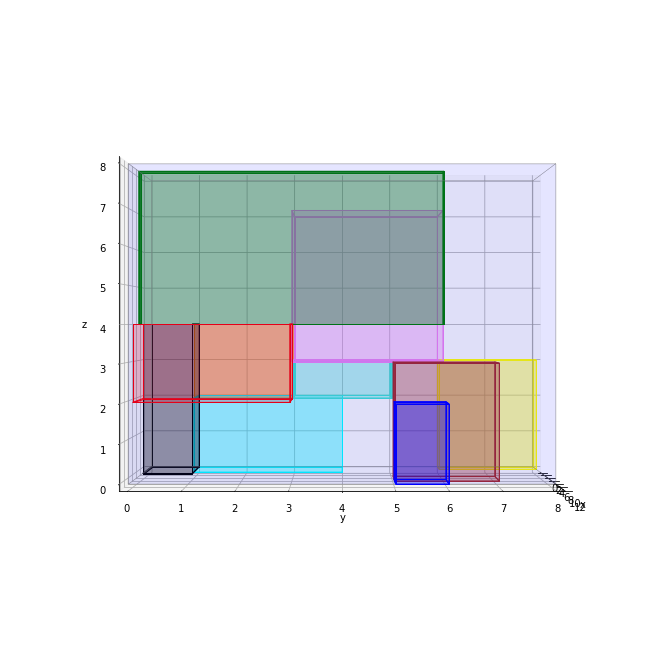

In [361]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from itertools import product

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

# create list of corners
z = list(product([-1,1], repeat=3))

FLB=(0,0,0)
FLT=(0,0,H)
FRT=(0,W,H)
FRB=(0,W,0)

RLB=(L,0,0)
RLT=(L,0,H)
RRT=(L,W,H)
RRB=(L,W,0)

verts=[  [FLB,FLT,FRT,FRB], [FLB,FLT,RLT,RLB],[FLT,FRT,RRT,RLT],[RRT,FRT,FRB,RRB],[RLB,FLB,FRB,RRB],[RLB,RLT,RRT,RRB]

]



FLB1=(5,0,2)
FLT1=(5,0,2+h[1])
FRT1=(5,0+w[1],2+h[1])
FRB1=(5,0+w[1],2)

RLB1=(5+l[1],0,2)
RLT1=(5+l[1],0,2+h[1])
RRT1=(5+l[1],0+w[1],2+h[1])
RRB1=(5+l[1],0+w[1],2)

# set verts connectors
#verts = [[z[0],z[1],z[5],z[4]], [z[4],z[6],z[7],z[5]], [z[7], z[6], z[2], z[3]], [z[2], z[0], z[1], z[3]],
 #        [z[5], z[7], z[3], z[1]], [z[0], z[2], z[6], z[4]]]

verts1=[  [FLB1,FLT1,FRT1,FRB1], [FLB1,FLT1,RLT1,RLB1],[FLT1,FRT1,RRT1,RLT1],[RRT1,FRT1,FRB1,RRB1],[RLB1,FLB1,FRB1,RRB1],[RLB1,RLT1,RRT1,RRB1]

]

FLB2=(6,0,4)
FLT2=(6,0,4+w[2])
FRT2=(6,0+l[2],4+w[2])
FRB2=(6,0+l[2],4)

RLB2=(6+h[2],0,4)
RLT2=(6+h[2],0,4+w[2])
RRT2=(6+h[2],0+l[2],4+w[2])
RRB2=(6+h[2],0+l[2],4)


FLB3=(0,1,2)
FLT3=(0,1,2+w[3])
FRT3=(0,1+h[3],2+w[3])
FRB3=(0,1+h[3],2)

RLB3=(0+l[3],1,2)
RLT3=(0+l[3],1,2+w[3])
RRT3=(0+l[3],1+h[3],2+w[3])
RRB3=(0+l[3],1+h[3],2)


# set verts connectors
#verts = [[z[0],z[1],z[5],z[4]], [z[4],z[6],z[7],z[5]], [z[7], z[6], z[2], z[3]], [z[2], z[0], z[1], z[3]],
 #        [z[5], z[7], z[3], z[1]], [z[0], z[2], z[6], z[4]]]


verts2=[  [FLB2,FLT2,FRT2,FRB2], [FLB2,FLT2,RLT2,RLB2],[FLT2,FRT2,RRT2,RLT2],[RRT2,FRT2,FRB2,RRB2],[RLB2,FLB2,FRB2,RRB2],[RLB2,RLT2,RRT2,RRB2]]
verts3=[  [FLB3,FLT3,FRT3,FRB3], [FLB3,FLT3,RLT3,RLB3],[FLT3,FRT3,RRT3,RLT3],[RRT3,FRT3,FRB3,RRB3],[RLB3,FLB3,FRB3,RRB3],[RLB3,RLT3,RRT3,RRB3]]


FLB4=(0,0,0)
FLT4=(0,0,0+w[4])
FRT4=(0,0+h[4],0+w[4])
FRB4=(0,0+h[4],0)

RLB4=(0+l[4],0,0)
RLT4=(0+l[4],0,0+w[4])
RRT4=(0+l[4],0+h[4],0+w[4])
RRB4=(0+l[4],0+h[4],0)

verts4=[  [FLB4,FLT4,FRT4,FRB4], [FLB4,FLT4,RLT4,RLB4],[FLT4,FRT4,RRT4,RLT4],[RRT4,FRT4,FRB4,RRB4],[RLB4,FLB4,FRB4,RRB4],[RLB4,RLT4,RRT4,RRB4]]


FLB5=(0,1,0)
FLT5=(0,1,0+w[5])
FRT5=(0,1+h[5],0+w[5])
FRB5=(0,1+h[5],0)

RLB5=(0+l[5],1,0)
RLT5=(0+l[5],1,0+w[5])
RRT5=(0+l[5],1+h[5],0+w[5])
RRB5=(0+l[5],1+h[5],0)

verts5=[  [FLB5,FLT5,FRT5,FRB5], [FLB5,FLT5,RLT5,RLB5],[FLT5,FRT5,RRT5,RLT5],[RRT5,FRT5,FRB5,RRB5],[RLB5,FLB5,FRB5,RRB5],[RLB5,RLT5,RRT5,RRB5]]

FLB6=(7,5,0)
FLT6=(7,5,0+l[6])
FRT6=(7,5+h[6],0+l[6])
FRB6=(7,5+h[6],0)

RLB6=(7+w[6],5,0)
RLT6=(7+w[6],5,0+l[6])
RRT6=(7+w[6],5+h[6],0+l[6])
RRB6=(7+w[6],5+h[6],0)

verts6=[  [FLB6,FLT6,FRT6,FRB6], [FLB6,FLT6,RLT6,RLB6],[FLT6,FRT6,RRT6,RLT6],[RRT6,FRT6,FRB6,RRB6],[RLB6,FLB6,FRB6,RRB6],[RLB6,RLT6,RRT6,RRB6]]


FLB7=(0,3,3)
FLT7=(0,3,3+w[7])
FRT7=(0,3+h[7],3+w[7])
FRB7=(0,3+h[7],3)

RLB7=(0+l[7],3,3)
RLT7=(0+l[7],3,3+w[7])
RRT7=(0+l[7],3+h[7],3+w[7])
RRB7=(0+l[7],3+h[7],3)

verts7=[  [FLB7,FLT7,FRT7,FRB7], [FLB7,FLT7,RLT7,RLB7],[FLT7,FRT7,RRT7,RLT7],[RRT7,FRT7,FRB7,RRB7],[RLB7,FLB7,FRB7,RRB7],[RLB7,RLT7,RRT7,RRB7]]


FLB8=(0,6,0)
FLT8=(0,6,0+l[8])
FRT8=(0,6+w[8],0+l[8])
FRB8=(0,6+w[8],0)

RLB8=(0+h[8],6,0)
RLT8=(0+h[8],6,0+l[8])
RRT8=(0+h[8],6+w[8],0+l[8])
RRB8=(0+h[8],6+w[8],0)

verts8=[  [FLB8,FLT8,FRT8,FRB8], [FLB8,FLT8,RLT8,RLB8],[FLT8,FRT8,RRT8,RLT8],[RRT8,FRT8,FRB8,RRB8],[RLB8,FLB8,FRB8,RRB8],[RLB8,RLT8,RRT8,RRB8]]

FLB9=(0,3,2)
FLT9=(0,3,2+h[9])
FRT9=(0,3+w[9],2+h[9])
FRB9=(0,3+w[9],2)

RLB9=(0+l[9],3,2)
RLT9=(0+l[9],3,2+h[9])
RRT9=(0+l[9],3+w[9],2+h[9])
RRB9=(0+l[9],3+w[9],2)

# set verts connectors
#verts = [[z[0],z[1],z[5],z[4]], [z[4],z[6],z[7],z[5]], [z[7], z[6], z[2], z[3]], [z[2], z[0], z[1], z[3]],
 #        [z[5], z[7], z[3], z[1]], [z[0], z[2], z[6], z[4]]]

verts9=[  [FLB9,FLT9,FRT9,FRB9], [FLB9,FLT9,RLT9,RLB9],[FLT9,FRT9,RRT9,RLT9],[RRT9,FRT9,FRB9,RRB9],[RLB9,FLB9,FRB9,RRB9],[RLB9,RLT9,RRT9,RRB9]

]

FLB10=(9,5,0)
FLT10=(9,5,0+w[10])
FRT10=(9,5+h[10],0+w[10])
FRB10=(9,5+h[10],0)

RLB10=(9+l[10],5,0)
RLT10=(9+l[10],5,0+w[10])
RRT10=(9+l[10],5+h[10],0+w[10])
RRB10=(9+l[10],5+h[10],0)

verts10=[  [FLB10,FLT10,FRT10,FRB10], [FLB10,FLT10,RLT10,RLB10],[FLT10,FRT10,RRT10,RLT10],[RRT10,FRT10,FRB10,RRB10],[RLB10,FLB10,FRB10,RRB10],[RLB10,RLT10,RRT10,RRB10]]

ax.set_xlim3d(0,12)
ax.set_ylim3d(0,8)
ax.set_zlim3d(0,8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# plot sides
ax.add_collection3d(Poly3DCollection(verts,facecolors='blue', linewidths=0.25, edgecolors='grey', alpha=.05))
ax.add_collection3d(Poly3DCollection(verts1,facecolors='red', linewidths=1, edgecolors='red', alpha=.1))
ax.add_collection3d(Poly3DCollection(verts2,facecolors='green', linewidths=1, edgecolors='green', alpha=.2))
ax.add_collection3d(Poly3DCollection(verts3,facecolors='orange', linewidths=1, edgecolors='orange', alpha=.2))
ax.add_collection3d(Poly3DCollection(verts4,facecolors='black', linewidths=1, edgecolors='black', alpha=.2))
ax.add_collection3d(Poly3DCollection(verts5,facecolors='cyan', linewidths=1, edgecolors='cyan', alpha=.2))
ax.add_collection3d(Poly3DCollection(verts6,facecolors='brown', linewidths=1, edgecolors='brown', alpha=.2))
ax.add_collection3d(Poly3DCollection(verts7,facecolors='violet', linewidths=1, edgecolors='violet', alpha=.2))
ax.add_collection3d(Poly3DCollection(verts8,facecolors='yellow', linewidths=1, edgecolors='yellow', alpha=.2))
ax.add_collection3d(Poly3DCollection(verts9,facecolors='turquoise', linewidths=1, edgecolors='turquoise', alpha=.2))
ax.add_collection3d(Poly3DCollection(verts10,facecolors='blue', linewidths=1, edgecolors='blue', alpha=.2))

ax.view_init(elev=0, azim=0)
plt.show()

In [121]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from itertools import product

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

# create list of corners
z = list(product([-1,1], repeat=3))

FLB=(0,0,0)
FLT=(0,0,H)
FRT=(0,W,H)
FRB=(0,W,0)

RLB=(L,0,0)
RLT=(L,0,H)
RRT=(L,W,H)
RRB=(L,W,0)

verts=[  [FLB,FLT,FRT,FRB], [FLB,FLT,RLT,RLB],[FLT,FRT,RRT,RLT],[RRT,FRT,FRB,RRB],[RLB,FLB,FRB,RRB],[RLB,RLT,RRT,RRB]

]



FLB1=(5,0,0)
FLT1=(5,0,0+h[1])
FRT1=(5,0+w[1],0+h[1])
FRB1=(5,0+w[1],0)

RLB1=(5+l[1],0,0)
RLT1=(5+l[1],0,0+h[1])
RRT1=(5+l[1],0+w[1],0+h[1])
RRB1=(5+l[1],0+w[1],0)

# set verts connectors
#verts = [[z[0],z[1],z[5],z[4]], [z[4],z[6],z[7],z[5]], [z[7], z[6], z[2], z[3]], [z[2], z[0], z[1], z[3]],
 #        [z[5], z[7], z[3], z[1]], [z[0], z[2], z[6], z[4]]]

verts1=[  [FLB1,FLT1,FRT1,FRB1], [FLB1,FLT1,RLT1,RLB1],[FLT1,FRT1,RRT1,RLT1],[RRT1,FRT1,FRB1,RRB1],[RLB1,FLB1,FRB1,RRB1],[RLB1,RLT1,RRT1,RRB1]

]

FLB2=(6,0,4)
FLT2=(6,0,4+w[2])
FRT2=(6,0+l[2],4+w[2])
FRB2=(6,0+l[2],4)

RLB2=(6+h[2],0,4)
RLT2=(6+h[2],0,4+w[2])
RRT2=(6+h[2],0+l[2],4+w[2])
RRB2=(6+h[2],0+l[2],4)



FLB3=(0,1,2)
FLT3=(0,1,2+w[3])
FRT3=(0,1+h[3],2+w[3])
FRB3=(0,1+h[3],2)

RLB3=(0+l[3],1,2)
RLT3=(0+l[3],1,2+w[3])
RRT3=(0+l[3],1+h[3],2+w[3])
RRB3=(0+l[3],1+h[3],2)


# set verts connectors
#verts = [[z[0],z[1],z[5],z[4]], [z[4],z[6],z[7],z[5]], [z[7], z[6], z[2], z[3]], [z[2], z[0], z[1], z[3]],
 #        [z[5], z[7], z[3], z[1]], [z[0], z[2], z[6], z[4]]]


verts2=[  [FLB2,FLT2,FRT2,FRB2], [FLB2,FLT2,RLT2,RLB2],[FLT2,FRT2,RRT2,RLT2],[RRT2,FRT2,FRB2,RRB2],[RLB2,FLB2,FRB2,RRB2],[RLB2,RLT2,RRT2,RRB2]]
verts3=[  [FLB3,FLT3,FRT3,FRB3], [FLB3,FLT3,RLT3,RLB3],[FLT3,FRT3,RRT3,RLT3],[RRT3,FRT3,FRB3,RRB3],[RLB3,FLB3,FRB3,RRB3],[RLB3,RLT3,RRT3,RRB3]]


FLB4=(0,0,0)
FLT4=(0,0,0+w[4])
FRT4=(0,0+h[4],0+w[4])
FRB4=(0,0+h[4],0)

RLB4=(0+l[4],0,0)
RLT4=(0+l[4],0,0+w[4])
RRT4=(0+l[4],0+h[4],0+w[4])
RRB4=(0+l[4],0+h[4],0)

verts4=[  [FLB4,FLT4,FRT4,FRB4], [FLB4,FLT4,RLT4,RLB4],[FLT4,FRT4,RRT4,RLT4],[RRT4,FRT4,FRB4,RRB4],[RLB4,FLB4,FRB4,RRB4],[RLB4,RLT4,RRT4,RRB4]]


FLB5=(0,1,0)
FLT5=(0,1,0+w[5])
FRT5=(0,1+h[5],0+w[5])
FRB5=(0,1+h[5],0)

RLB5=(0+l[5],1,0)
RLT5=(0+l[5],1,0+w[5])
RRT5=(0+l[5],1+h[5],0+w[5])
RRB5=(0+l[5],1+h[5],0)

verts5=[  [FLB5,FLT5,FRT5,FRB5], [FLB5,FLT5,RLT5,RLB5],[FLT5,FRT5,RRT5,RLT5],[RRT5,FRT5,FRB5,RRB5],[RLB5,FLB5,FRB5,RRB5],[RLB5,RLT5,RRT5,RRB5]]

FLB6=(7,5,0)
FLT6=(7,5,0+l[6])
FRT6=(7,5+h[6],0+l[6])
FRB6=(7,5+h[6],0)

RLB6=(7+w[6],5,0)
RLT6=(7+w[6],5,0+l[6])
RRT6=(7+w[6],5+h[6],0+l[6])
RRB6=(7+w[6],5+h[6],0)

verts6=[  [FLB6,FLT6,FRT6,FRB6], [FLB6,FLT6,RLT6,RLB6],[FLT6,FRT6,RRT6,RLT6],[RRT6,FRT6,FRB6,RRB6],[RLB6,FLB6,FRB6,RRB6],[RLB6,RLT6,RRT6,RRB6]]


FLB7=(0,3,3)
FLT7=(0,3,3+w[7])
FRT7=(0,3+h[7],3+w[7])
FRB7=(0,3+h[7],3)

RLB7=(0+l[7],3,3)
RLT7=(0+l[7],3,3+w[7])
RRT7=(0+l[7],3+h[7],3+w[7])
RRB7=(0+l[7],3+h[7],3)

verts7=[  [FLB7,FLT7,FRT7,FRB7], [FLB7,FLT7,RLT7,RLB7],[FLT7,FRT7,RRT7,RLT7],[RRT7,FRT7,FRB7,RRB7],[RLB7,FLB7,FRB7,RRB7],[RLB7,RLT7,RRT7,RRB7]]


FLB8=(0,6,0)
FLT8=(0,6,0+l[8])
FRT8=(0,6+w[8],0+l[8])
FRB8=(0,6+w[8],0)

RLB8=(0+h[8],6,0)
RLT8=(0+h[8],6,0+l[8])
RRT8=(0+h[8],6+w[8],0+l[8])
RRB8=(0+h[8],6+w[8],0)

verts8=[  [FLB8,FLT8,FRT8,FRB8], [FLB8,FLT8,RLT8,RLB8],[FLT8,FRT8,RRT8,RLT8],[RRT8,FRT8,FRB8,RRB8],[RLB8,FLB8,FRB8,RRB8],[RLB8,RLT8,RRT8,RRB8]]

FLB9=(0,3,2)
FLT9=(0,3,2+h[9])
FRT9=(0,3+w[9],2+h[9])
FRB9=(0,3+w[9],2)

RLB9=(0+l[9],3,2)
RLT9=(0+l[9],3,2+h[9])
RRT9=(0+l[9],3+w[9],2+h[9])
RRB9=(0+l[9],3+w[9],2)

# set verts connectors
#verts = [[z[0],z[1],z[5],z[4]], [z[4],z[6],z[7],z[5]], [z[7], z[6], z[2], z[3]], [z[2], z[0], z[1], z[3]],
 #        [z[5], z[7], z[3], z[1]], [z[0], z[2], z[6], z[4]]]

verts9=[  [FLB9,FLT9,FRT9,FRB9], [FLB9,FLT9,RLT9,RLB9],[FLT9,FRT9,RRT9,RLT9],[RRT9,FRT9,FRB9,RRB9],[RLB9,FLB9,FRB9,RRB9],[RLB9,RLT9,RRT9,RRB9]

]

FLB10=(9,5,0)
FLT10=(9,5,0+w[10])
FRT10=(9,5+h[10],0+w[10])
FRB10=(9,5+h[10],0)

RLB10=(9+l[10],5,0)
RLT10=(9+l[10],5,0+w[10])
RRT10=(9+l[10],5+h[10],0+w[10])
RRB10=(9+l[10],5+h[10],0)

verts10=[  [FLB10,FLT10,FRT10,FRB10], [FLB10,FLT10,RLT10,RLB10],[FLT10,FRT10,RRT10,RLT10],[RRT10,FRT10,FRB10,RRB10],[RLB10,FLB10,FRB10,RRB10],[RLB10,RLT10,RRT10,RRB10]]

ax.set_xlim3d(0,12)
ax.set_ylim3d(0,8)
ax.set_zlim3d(0,8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.grid(False)
# plot sides
ax.add_collection3d(Poly3DCollection(verts,facecolors='blue', linewidths=0.25, edgecolors='grey', alpha=.05))
ax.add_collection3d(Poly3DCollection(verts1,facecolors='red', linewidths=1, edgecolors='black', alpha=1))
ax.add_collection3d(Poly3DCollection(verts2,facecolors='green', linewidths=1, edgecolors='black', alpha=1))
ax.add_collection3d(Poly3DCollection(verts3,facecolors='orange', linewidths=1, edgecolors='black', alpha=1))
ax.add_collection3d(Poly3DCollection(verts4,facecolors='black', linewidths=1, edgecolors='black', alpha=1))
ax.add_collection3d(Poly3DCollection(verts5,facecolors='cyan', linewidths=1, edgecolors='black', alpha=1))
ax.add_collection3d(Poly3DCollection(verts6,facecolors='brown', linewidths=1, edgecolors='black', alpha=1))
ax.add_collection3d(Poly3DCollection(verts7,facecolors='violet', linewidths=1, edgecolors='black', alpha=1))
ax.add_collection3d(Poly3DCollection(verts8,facecolors='yellow', linewidths=1, edgecolors='black', alpha=1))
ax.add_collection3d(Poly3DCollection(verts9,facecolors='turquoise', linewidths=1, edgecolors='black', alpha=1))
ax.add_collection3d(Poly3DCollection(verts10,facecolors='blue', linewidths=1, edgecolors='black', alpha=1))

#ax.view_init(elev=0, azim=45)
plt.show()

<IPython.core.display.Javascript object>

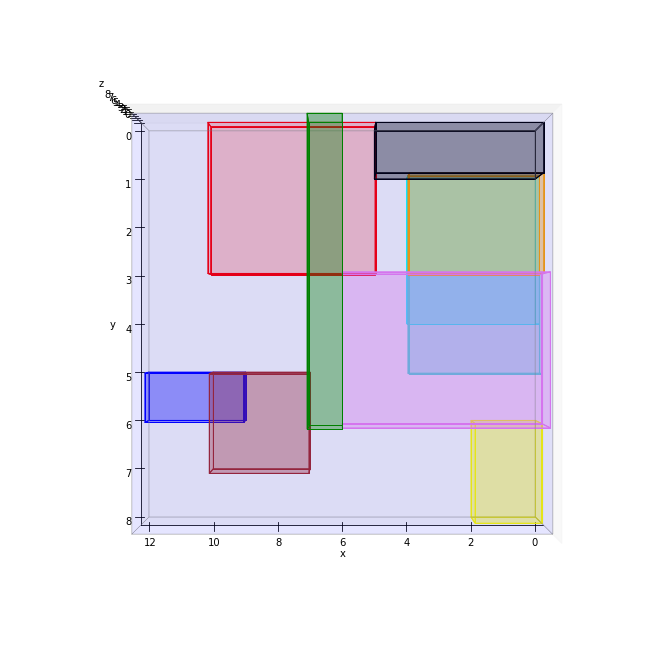

In [383]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from itertools import product

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

# create list of corners
z = list(product([-1,1], repeat=3))

FLB=(0,0,0)
FLT=(0,0,H)
FRT=(0,W,H)
FRB=(0,W,0)

RLB=(L,0,0)
RLT=(L,0,H)
RRT=(L,W,H)
RRB=(L,W,0)

verts=[  [FLB,FLT,FRT,FRB], [FLB,FLT,RLT,RLB],[FLT,FRT,RRT,RLT],[RRT,FRT,FRB,RRB],[RLB,FLB,FRB,RRB],[RLB,RLT,RRT,RRB]

]



FLB1=(5,0,2)
FLT1=(5,0,2+h[1])
FRT1=(5,0+w[1],2+h[1])
FRB1=(5,0+w[1],2)

RLB1=(5+l[1],0,2)
RLT1=(5+l[1],0,2+h[1])
RRT1=(5+l[1],0+w[1],2+h[1])
RRB1=(5+l[1],0+w[1],2)

# set verts connectors
#verts = [[z[0],z[1],z[5],z[4]], [z[4],z[6],z[7],z[5]], [z[7], z[6], z[2], z[3]], [z[2], z[0], z[1], z[3]],
 #        [z[5], z[7], z[3], z[1]], [z[0], z[2], z[6], z[4]]]

verts1=[  [FLB1,FLT1,FRT1,FRB1], [FLB1,FLT1,RLT1,RLB1],[FLT1,FRT1,RRT1,RLT1],[RRT1,FRT1,FRB1,RRB1],[RLB1,FLB1,FRB1,RRB1],[RLB1,RLT1,RRT1,RRB1]

]

FLB2=(6,0,4)
FLT2=(6,0,4+w[2])
FRT2=(6,0+l[2],4+w[2])
FRB2=(6,0+l[2],4)

RLB2=(6+h[2],0,4)
RLT2=(6+h[2],0,4+w[2])
RRT2=(6+h[2],0+l[2],4+w[2])
RRB2=(6+h[2],0+l[2],4)


FLB3=(0,1,2)
FLT3=(0,1,2+w[3])
FRT3=(0,1+h[3],2+w[3])
FRB3=(0,1+h[3],2)

RLB3=(0+l[3],1,2)
RLT3=(0+l[3],1,2+w[3])
RRT3=(0+l[3],1+h[3],2+w[3])
RRB3=(0+l[3],1+h[3],2)


# set verts connectors
#verts = [[z[0],z[1],z[5],z[4]], [z[4],z[6],z[7],z[5]], [z[7], z[6], z[2], z[3]], [z[2], z[0], z[1], z[3]],
 #        [z[5], z[7], z[3], z[1]], [z[0], z[2], z[6], z[4]]]


verts2=[  [FLB2,FLT2,FRT2,FRB2], [FLB2,FLT2,RLT2,RLB2],[FLT2,FRT2,RRT2,RLT2],[RRT2,FRT2,FRB2,RRB2],[RLB2,FLB2,FRB2,RRB2],[RLB2,RLT2,RRT2,RRB2]]
verts3=[  [FLB3,FLT3,FRT3,FRB3], [FLB3,FLT3,RLT3,RLB3],[FLT3,FRT3,RRT3,RLT3],[RRT3,FRT3,FRB3,RRB3],[RLB3,FLB3,FRB3,RRB3],[RLB3,RLT3,RRT3,RRB3]]


FLB4=(0,0,0)
FLT4=(0,0,0+w[4])
FRT4=(0,0+h[4],0+w[4])
FRB4=(0,0+h[4],0)

RLB4=(0+l[4],0,0)
RLT4=(0+l[4],0,0+w[4])
RRT4=(0+l[4],0+h[4],0+w[4])
RRB4=(0+l[4],0+h[4],0)

verts4=[  [FLB4,FLT4,FRT4,FRB4], [FLB4,FLT4,RLT4,RLB4],[FLT4,FRT4,RRT4,RLT4],[RRT4,FRT4,FRB4,RRB4],[RLB4,FLB4,FRB4,RRB4],[RLB4,RLT4,RRT4,RRB4]]


FLB5=(0,1,0)
FLT5=(0,1,0+w[5])
FRT5=(0,1+h[5],0+w[5])
FRB5=(0,1+h[5],0)

RLB5=(0+l[5],1,0)
RLT5=(0+l[5],1,0+w[5])
RRT5=(0+l[5],1+h[5],0+w[5])
RRB5=(0+l[5],1+h[5],0)

verts5=[  [FLB5,FLT5,FRT5,FRB5], [FLB5,FLT5,RLT5,RLB5],[FLT5,FRT5,RRT5,RLT5],[RRT5,FRT5,FRB5,RRB5],[RLB5,FLB5,FRB5,RRB5],[RLB5,RLT5,RRT5,RRB5]]

FLB6=(7,5,0)
FLT6=(7,5,0+l[6])
FRT6=(7,5+h[6],0+l[6])
FRB6=(7,5+h[6],0)

RLB6=(7+w[6],5,0)
RLT6=(7+w[6],5,0+l[6])
RRT6=(7+w[6],5+h[6],0+l[6])
RRB6=(7+w[6],5+h[6],0)

verts6=[  [FLB6,FLT6,FRT6,FRB6], [FLB6,FLT6,RLT6,RLB6],[FLT6,FRT6,RRT6,RLT6],[RRT6,FRT6,FRB6,RRB6],[RLB6,FLB6,FRB6,RRB6],[RLB6,RLT6,RRT6,RRB6]]


FLB7=(0,3,3)
FLT7=(0,3,3+w[7])
FRT7=(0,3+h[7],3+w[7])
FRB7=(0,3+h[7],3)

RLB7=(0+l[7],3,3)
RLT7=(0+l[7],3,3+w[7])
RRT7=(0+l[7],3+h[7],3+w[7])
RRB7=(0+l[7],3+h[7],3)

verts7=[  [FLB7,FLT7,FRT7,FRB7], [FLB7,FLT7,RLT7,RLB7],[FLT7,FRT7,RRT7,RLT7],[RRT7,FRT7,FRB7,RRB7],[RLB7,FLB7,FRB7,RRB7],[RLB7,RLT7,RRT7,RRB7]]


FLB8=(0,6,0)
FLT8=(0,6,0+l[8])
FRT8=(0,6+w[8],0+l[8])
FRB8=(0,6+w[8],0)

RLB8=(0+h[8],6,0)
RLT8=(0+h[8],6,0+l[8])
RRT8=(0+h[8],6+w[8],0+l[8])
RRB8=(0+h[8],6+w[8],0)

verts8=[  [FLB8,FLT8,FRT8,FRB8], [FLB8,FLT8,RLT8,RLB8],[FLT8,FRT8,RRT8,RLT8],[RRT8,FRT8,FRB8,RRB8],[RLB8,FLB8,FRB8,RRB8],[RLB8,RLT8,RRT8,RRB8]]

FLB9=(0,3,2)
FLT9=(0,3,2+h[9])
FRT9=(0,3+w[9],2+h[9])
FRB9=(0,3+w[9],2)

RLB9=(0+l[9],3,2)
RLT9=(0+l[9],3,2+h[9])
RRT9=(0+l[9],3+w[9],2+h[9])
RRB9=(0+l[9],3+w[9],2)

# set verts connectors
#verts = [[z[0],z[1],z[5],z[4]], [z[4],z[6],z[7],z[5]], [z[7], z[6], z[2], z[3]], [z[2], z[0], z[1], z[3]],
 #        [z[5], z[7], z[3], z[1]], [z[0], z[2], z[6], z[4]]]

verts9=[  [FLB9,FLT9,FRT9,FRB9], [FLB9,FLT9,RLT9,RLB9],[FLT9,FRT9,RRT9,RLT9],[RRT9,FRT9,FRB9,RRB9],[RLB9,FLB9,FRB9,RRB9],[RLB9,RLT9,RRT9,RRB9]

]

FLB10=(9,5,0)
FLT10=(9,5,0+w[10])
FRT10=(9,5+h[10],0+w[10])
FRB10=(9,5+h[10],0)

RLB10=(9+l[10],5,0)
RLT10=(9+l[10],5,0+w[10])
RRT10=(9+l[10],5+h[10],0+w[10])
RRB10=(9+l[10],5+h[10],0)

verts10=[  [FLB10,FLT10,FRT10,FRB10], [FLB10,FLT10,RLT10,RLB10],[FLT10,FRT10,RRT10,RLT10],[RRT10,FRT10,FRB10,RRB10],[RLB10,FLB10,FRB10,RRB10],[RLB10,RLT10,RRT10,RRB10]]

ax.set_xlim3d(0,12)
ax.set_ylim3d(0,8)
ax.set_zlim3d(0,8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.grid(False)
# plot sides
ax.add_collection3d(Poly3DCollection(verts,facecolors='blue', linewidths=0.25, edgecolors='grey', alpha=.05))
ax.add_collection3d(Poly3DCollection(verts1,facecolors='red', linewidths=1, edgecolors='red', alpha=.1))
ax.add_collection3d(Poly3DCollection(verts2,facecolors='green', linewidths=1, edgecolors='green', alpha=.2))
ax.add_collection3d(Poly3DCollection(verts3,facecolors='orange', linewidths=1, edgecolors='orange', alpha=.2))
ax.add_collection3d(Poly3DCollection(verts4,facecolors='black', linewidths=1, edgecolors='black', alpha=.2))
ax.add_collection3d(Poly3DCollection(verts5,facecolors='cyan', linewidths=1, edgecolors='cyan', alpha=.2))
ax.add_collection3d(Poly3DCollection(verts6,facecolors='brown', linewidths=1, edgecolors='brown', alpha=.2))
ax.add_collection3d(Poly3DCollection(verts7,facecolors='violet', linewidths=1, edgecolors='violet', alpha=.2))
ax.add_collection3d(Poly3DCollection(verts8,facecolors='yellow', linewidths=1, edgecolors='yellow', alpha=.2))
ax.add_collection3d(Poly3DCollection(verts9,facecolors='turquoise', linewidths=1, edgecolors='turquoise', alpha=.2))
ax.add_collection3d(Poly3DCollection(verts10,facecolors='blue', linewidths=1, edgecolors='blue', alpha=.2))

ax.view_init(elev=90, azim=90)
plt.show()

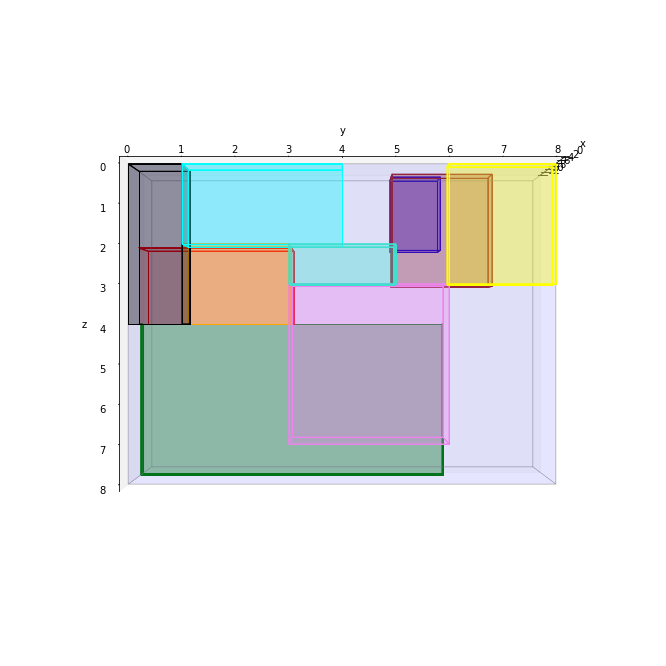

In [384]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from itertools import product

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

# create list of corners
z = list(product([-1,1], repeat=3))

FLB=(0,0,0)
FLT=(0,0,H)
FRT=(0,W,H)
FRB=(0,W,0)

RLB=(L,0,0)
RLT=(L,0,H)
RRT=(L,W,H)
RRB=(L,W,0)

verts=[  [FLB,FLT,FRT,FRB], [FLB,FLT,RLT,RLB],[FLT,FRT,RRT,RLT],[RRT,FRT,FRB,RRB],[RLB,FLB,FRB,RRB],[RLB,RLT,RRT,RRB]

]



FLB1=(5,0,2)
FLT1=(5,0,2+h[1])
FRT1=(5,0+w[1],2+h[1])
FRB1=(5,0+w[1],2)

RLB1=(5+l[1],0,2)
RLT1=(5+l[1],0,2+h[1])
RRT1=(5+l[1],0+w[1],2+h[1])
RRB1=(5+l[1],0+w[1],2)

# set verts connectors
#verts = [[z[0],z[1],z[5],z[4]], [z[4],z[6],z[7],z[5]], [z[7], z[6], z[2], z[3]], [z[2], z[0], z[1], z[3]],
 #        [z[5], z[7], z[3], z[1]], [z[0], z[2], z[6], z[4]]]

verts1=[  [FLB1,FLT1,FRT1,FRB1], [FLB1,FLT1,RLT1,RLB1],[FLT1,FRT1,RRT1,RLT1],[RRT1,FRT1,FRB1,RRB1],[RLB1,FLB1,FRB1,RRB1],[RLB1,RLT1,RRT1,RRB1]

]

FLB2=(6,0,4)
FLT2=(6,0,4+w[2])
FRT2=(6,0+l[2],4+w[2])
FRB2=(6,0+l[2],4)

RLB2=(6+h[2],0,4)
RLT2=(6+h[2],0,4+w[2])
RRT2=(6+h[2],0+l[2],4+w[2])
RRB2=(6+h[2],0+l[2],4)


FLB3=(0,1,2)
FLT3=(0,1,2+w[3])
FRT3=(0,1+h[3],2+w[3])
FRB3=(0,1+h[3],2)

RLB3=(0+l[3],1,2)
RLT3=(0+l[3],1,2+w[3])
RRT3=(0+l[3],1+h[3],2+w[3])
RRB3=(0+l[3],1+h[3],2)


# set verts connectors
#verts = [[z[0],z[1],z[5],z[4]], [z[4],z[6],z[7],z[5]], [z[7], z[6], z[2], z[3]], [z[2], z[0], z[1], z[3]],
 #        [z[5], z[7], z[3], z[1]], [z[0], z[2], z[6], z[4]]]


verts2=[  [FLB2,FLT2,FRT2,FRB2], [FLB2,FLT2,RLT2,RLB2],[FLT2,FRT2,RRT2,RLT2],[RRT2,FRT2,FRB2,RRB2],[RLB2,FLB2,FRB2,RRB2],[RLB2,RLT2,RRT2,RRB2]]
verts3=[  [FLB3,FLT3,FRT3,FRB3], [FLB3,FLT3,RLT3,RLB3],[FLT3,FRT3,RRT3,RLT3],[RRT3,FRT3,FRB3,RRB3],[RLB3,FLB3,FRB3,RRB3],[RLB3,RLT3,RRT3,RRB3]]


FLB4=(0,0,0)
FLT4=(0,0,0+w[4])
FRT4=(0,0+h[4],0+w[4])
FRB4=(0,0+h[4],0)

RLB4=(0+l[4],0,0)
RLT4=(0+l[4],0,0+w[4])
RRT4=(0+l[4],0+h[4],0+w[4])
RRB4=(0+l[4],0+h[4],0)

verts4=[  [FLB4,FLT4,FRT4,FRB4], [FLB4,FLT4,RLT4,RLB4],[FLT4,FRT4,RRT4,RLT4],[RRT4,FRT4,FRB4,RRB4],[RLB4,FLB4,FRB4,RRB4],[RLB4,RLT4,RRT4,RRB4]]


FLB5=(0,1,0)
FLT5=(0,1,0+w[5])
FRT5=(0,1+h[5],0+w[5])
FRB5=(0,1+h[5],0)

RLB5=(0+l[5],1,0)
RLT5=(0+l[5],1,0+w[5])
RRT5=(0+l[5],1+h[5],0+w[5])
RRB5=(0+l[5],1+h[5],0)

verts5=[  [FLB5,FLT5,FRT5,FRB5], [FLB5,FLT5,RLT5,RLB5],[FLT5,FRT5,RRT5,RLT5],[RRT5,FRT5,FRB5,RRB5],[RLB5,FLB5,FRB5,RRB5],[RLB5,RLT5,RRT5,RRB5]]

FLB6=(7,5,0)
FLT6=(7,5,0+l[6])
FRT6=(7,5+h[6],0+l[6])
FRB6=(7,5+h[6],0)

RLB6=(7+w[6],5,0)
RLT6=(7+w[6],5,0+l[6])
RRT6=(7+w[6],5+h[6],0+l[6])
RRB6=(7+w[6],5+h[6],0)

verts6=[  [FLB6,FLT6,FRT6,FRB6], [FLB6,FLT6,RLT6,RLB6],[FLT6,FRT6,RRT6,RLT6],[RRT6,FRT6,FRB6,RRB6],[RLB6,FLB6,FRB6,RRB6],[RLB6,RLT6,RRT6,RRB6]]


FLB7=(0,3,3)
FLT7=(0,3,3+w[7])
FRT7=(0,3+h[7],3+w[7])
FRB7=(0,3+h[7],3)

RLB7=(0+l[7],3,3)
RLT7=(0+l[7],3,3+w[7])
RRT7=(0+l[7],3+h[7],3+w[7])
RRB7=(0+l[7],3+h[7],3)

verts7=[  [FLB7,FLT7,FRT7,FRB7], [FLB7,FLT7,RLT7,RLB7],[FLT7,FRT7,RRT7,RLT7],[RRT7,FRT7,FRB7,RRB7],[RLB7,FLB7,FRB7,RRB7],[RLB7,RLT7,RRT7,RRB7]]


FLB8=(0,6,0)
FLT8=(0,6,0+l[8])
FRT8=(0,6+w[8],0+l[8])
FRB8=(0,6+w[8],0)

RLB8=(0+h[8],6,0)
RLT8=(0+h[8],6,0+l[8])
RRT8=(0+h[8],6+w[8],0+l[8])
RRB8=(0+h[8],6+w[8],0)

verts8=[  [FLB8,FLT8,FRT8,FRB8], [FLB8,FLT8,RLT8,RLB8],[FLT8,FRT8,RRT8,RLT8],[RRT8,FRT8,FRB8,RRB8],[RLB8,FLB8,FRB8,RRB8],[RLB8,RLT8,RRT8,RRB8]]

FLB9=(0,3,2)
FLT9=(0,3,2+h[9])
FRT9=(0,3+w[9],2+h[9])
FRB9=(0,3+w[9],2)

RLB9=(0+l[9],3,2)
RLT9=(0+l[9],3,2+h[9])
RRT9=(0+l[9],3+w[9],2+h[9])
RRB9=(0+l[9],3+w[9],2)

# set verts connectors
#verts = [[z[0],z[1],z[5],z[4]], [z[4],z[6],z[7],z[5]], [z[7], z[6], z[2], z[3]], [z[2], z[0], z[1], z[3]],
 #        [z[5], z[7], z[3], z[1]], [z[0], z[2], z[6], z[4]]]

verts9=[  [FLB9,FLT9,FRT9,FRB9], [FLB9,FLT9,RLT9,RLB9],[FLT9,FRT9,RRT9,RLT9],[RRT9,FRT9,FRB9,RRB9],[RLB9,FLB9,FRB9,RRB9],[RLB9,RLT9,RRT9,RRB9]

]

FLB10=(9,5,0)
FLT10=(9,5,0+w[10])
FRT10=(9,5+h[10],0+w[10])
FRB10=(9,5+h[10],0)

RLB10=(9+l[10],5,0)
RLT10=(9+l[10],5,0+w[10])
RRT10=(9+l[10],5+h[10],0+w[10])
RRB10=(9+l[10],5+h[10],0)

verts10=[  [FLB10,FLT10,FRT10,FRB10], [FLB10,FLT10,RLT10,RLB10],[FLT10,FRT10,RRT10,RLT10],[RRT10,FRT10,FRB10,RRB10],[RLB10,FLB10,FRB10,RRB10],[RLB10,RLT10,RRT10,RRB10]]

ax.set_xlim3d(0,12)
ax.set_ylim3d(0,8)
ax.set_zlim3d(0,8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.grid(False)
# plot sides
ax.add_collection3d(Poly3DCollection(verts,facecolors='blue', linewidths=0.25, edgecolors='grey', alpha=.05))
ax.add_collection3d(Poly3DCollection(verts1,facecolors='red', linewidths=1, edgecolors='red', alpha=.1))
ax.add_collection3d(Poly3DCollection(verts2,facecolors='green', linewidths=1, edgecolors='green', alpha=.2))
ax.add_collection3d(Poly3DCollection(verts3,facecolors='orange', linewidths=1, edgecolors='orange', alpha=.2))
ax.add_collection3d(Poly3DCollection(verts4,facecolors='black', linewidths=1, edgecolors='black', alpha=.2))
ax.add_collection3d(Poly3DCollection(verts5,facecolors='cyan', linewidths=1, edgecolors='cyan', alpha=.2))
ax.add_collection3d(Poly3DCollection(verts6,facecolors='brown', linewidths=1, edgecolors='brown', alpha=.2))
ax.add_collection3d(Poly3DCollection(verts7,facecolors='violet', linewidths=1, edgecolors='violet', alpha=.2))
ax.add_collection3d(Poly3DCollection(verts8,facecolors='yellow', linewidths=1, edgecolors='yellow', alpha=.2))
ax.add_collection3d(Poly3DCollection(verts9,facecolors='turquoise', linewidths=1, edgecolors='turquoise', alpha=.2))
ax.add_collection3d(Poly3DCollection(verts10,facecolors='blue', linewidths=1, edgecolors='blue', alpha=.2))

ax.view_init(elev=-180, azim=0)
plt.show()

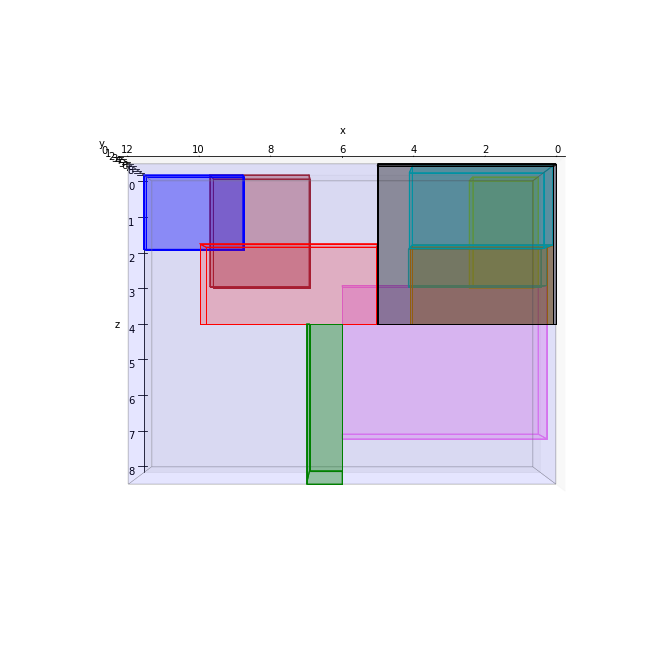

In [385]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from itertools import product

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

# create list of corners
z = list(product([-1,1], repeat=3))

FLB=(0,0,0)
FLT=(0,0,H)
FRT=(0,W,H)
FRB=(0,W,0)

RLB=(L,0,0)
RLT=(L,0,H)
RRT=(L,W,H)
RRB=(L,W,0)

verts=[  [FLB,FLT,FRT,FRB], [FLB,FLT,RLT,RLB],[FLT,FRT,RRT,RLT],[RRT,FRT,FRB,RRB],[RLB,FLB,FRB,RRB],[RLB,RLT,RRT,RRB]

]



FLB1=(5,0,2)
FLT1=(5,0,2+h[1])
FRT1=(5,0+w[1],2+h[1])
FRB1=(5,0+w[1],2)

RLB1=(5+l[1],0,2)
RLT1=(5+l[1],0,2+h[1])
RRT1=(5+l[1],0+w[1],2+h[1])
RRB1=(5+l[1],0+w[1],2)

# set verts connectors
#verts = [[z[0],z[1],z[5],z[4]], [z[4],z[6],z[7],z[5]], [z[7], z[6], z[2], z[3]], [z[2], z[0], z[1], z[3]],
 #        [z[5], z[7], z[3], z[1]], [z[0], z[2], z[6], z[4]]]

verts1=[  [FLB1,FLT1,FRT1,FRB1], [FLB1,FLT1,RLT1,RLB1],[FLT1,FRT1,RRT1,RLT1],[RRT1,FRT1,FRB1,RRB1],[RLB1,FLB1,FRB1,RRB1],[RLB1,RLT1,RRT1,RRB1]

]

FLB2=(6,0,4)
FLT2=(6,0,4+w[2])
FRT2=(6,0+l[2],4+w[2])
FRB2=(6,0+l[2],4)

RLB2=(6+h[2],0,4)
RLT2=(6+h[2],0,4+w[2])
RRT2=(6+h[2],0+l[2],4+w[2])
RRB2=(6+h[2],0+l[2],4)


FLB3=(0,1,2)
FLT3=(0,1,2+w[3])
FRT3=(0,1+h[3],2+w[3])
FRB3=(0,1+h[3],2)

RLB3=(0+l[3],1,2)
RLT3=(0+l[3],1,2+w[3])
RRT3=(0+l[3],1+h[3],2+w[3])
RRB3=(0+l[3],1+h[3],2)


# set verts connectors
#verts = [[z[0],z[1],z[5],z[4]], [z[4],z[6],z[7],z[5]], [z[7], z[6], z[2], z[3]], [z[2], z[0], z[1], z[3]],
 #        [z[5], z[7], z[3], z[1]], [z[0], z[2], z[6], z[4]]]


verts2=[  [FLB2,FLT2,FRT2,FRB2], [FLB2,FLT2,RLT2,RLB2],[FLT2,FRT2,RRT2,RLT2],[RRT2,FRT2,FRB2,RRB2],[RLB2,FLB2,FRB2,RRB2],[RLB2,RLT2,RRT2,RRB2]]
verts3=[  [FLB3,FLT3,FRT3,FRB3], [FLB3,FLT3,RLT3,RLB3],[FLT3,FRT3,RRT3,RLT3],[RRT3,FRT3,FRB3,RRB3],[RLB3,FLB3,FRB3,RRB3],[RLB3,RLT3,RRT3,RRB3]]


FLB4=(0,0,0)
FLT4=(0,0,0+w[4])
FRT4=(0,0+h[4],0+w[4])
FRB4=(0,0+h[4],0)

RLB4=(0+l[4],0,0)
RLT4=(0+l[4],0,0+w[4])
RRT4=(0+l[4],0+h[4],0+w[4])
RRB4=(0+l[4],0+h[4],0)

verts4=[  [FLB4,FLT4,FRT4,FRB4], [FLB4,FLT4,RLT4,RLB4],[FLT4,FRT4,RRT4,RLT4],[RRT4,FRT4,FRB4,RRB4],[RLB4,FLB4,FRB4,RRB4],[RLB4,RLT4,RRT4,RRB4]]


FLB5=(0,1,0)
FLT5=(0,1,0+w[5])
FRT5=(0,1+h[5],0+w[5])
FRB5=(0,1+h[5],0)

RLB5=(0+l[5],1,0)
RLT5=(0+l[5],1,0+w[5])
RRT5=(0+l[5],1+h[5],0+w[5])
RRB5=(0+l[5],1+h[5],0)

verts5=[  [FLB5,FLT5,FRT5,FRB5], [FLB5,FLT5,RLT5,RLB5],[FLT5,FRT5,RRT5,RLT5],[RRT5,FRT5,FRB5,RRB5],[RLB5,FLB5,FRB5,RRB5],[RLB5,RLT5,RRT5,RRB5]]

FLB6=(7,5,0)
FLT6=(7,5,0+l[6])
FRT6=(7,5+h[6],0+l[6])
FRB6=(7,5+h[6],0)

RLB6=(7+w[6],5,0)
RLT6=(7+w[6],5,0+l[6])
RRT6=(7+w[6],5+h[6],0+l[6])
RRB6=(7+w[6],5+h[6],0)

verts6=[  [FLB6,FLT6,FRT6,FRB6], [FLB6,FLT6,RLT6,RLB6],[FLT6,FRT6,RRT6,RLT6],[RRT6,FRT6,FRB6,RRB6],[RLB6,FLB6,FRB6,RRB6],[RLB6,RLT6,RRT6,RRB6]]


FLB7=(0,3,3)
FLT7=(0,3,3+w[7])
FRT7=(0,3+h[7],3+w[7])
FRB7=(0,3+h[7],3)

RLB7=(0+l[7],3,3)
RLT7=(0+l[7],3,3+w[7])
RRT7=(0+l[7],3+h[7],3+w[7])
RRB7=(0+l[7],3+h[7],3)

verts7=[  [FLB7,FLT7,FRT7,FRB7], [FLB7,FLT7,RLT7,RLB7],[FLT7,FRT7,RRT7,RLT7],[RRT7,FRT7,FRB7,RRB7],[RLB7,FLB7,FRB7,RRB7],[RLB7,RLT7,RRT7,RRB7]]


FLB8=(0,6,0)
FLT8=(0,6,0+l[8])
FRT8=(0,6+w[8],0+l[8])
FRB8=(0,6+w[8],0)

RLB8=(0+h[8],6,0)
RLT8=(0+h[8],6,0+l[8])
RRT8=(0+h[8],6+w[8],0+l[8])
RRB8=(0+h[8],6+w[8],0)

verts8=[  [FLB8,FLT8,FRT8,FRB8], [FLB8,FLT8,RLT8,RLB8],[FLT8,FRT8,RRT8,RLT8],[RRT8,FRT8,FRB8,RRB8],[RLB8,FLB8,FRB8,RRB8],[RLB8,RLT8,RRT8,RRB8]]

FLB9=(0,3,2)
FLT9=(0,3,2+h[9])
FRT9=(0,3+w[9],2+h[9])
FRB9=(0,3+w[9],2)

RLB9=(0+l[9],3,2)
RLT9=(0+l[9],3,2+h[9])
RRT9=(0+l[9],3+w[9],2+h[9])
RRB9=(0+l[9],3+w[9],2)

# set verts connectors
#verts = [[z[0],z[1],z[5],z[4]], [z[4],z[6],z[7],z[5]], [z[7], z[6], z[2], z[3]], [z[2], z[0], z[1], z[3]],
 #        [z[5], z[7], z[3], z[1]], [z[0], z[2], z[6], z[4]]]

verts9=[  [FLB9,FLT9,FRT9,FRB9], [FLB9,FLT9,RLT9,RLB9],[FLT9,FRT9,RRT9,RLT9],[RRT9,FRT9,FRB9,RRB9],[RLB9,FLB9,FRB9,RRB9],[RLB9,RLT9,RRT9,RRB9]

]

FLB10=(9,5,0)
FLT10=(9,5,0+w[10])
FRT10=(9,5+h[10],0+w[10])
FRB10=(9,5+h[10],0)

RLB10=(9+l[10],5,0)
RLT10=(9+l[10],5,0+w[10])
RRT10=(9+l[10],5+h[10],0+w[10])
RRB10=(9+l[10],5+h[10],0)

verts10=[  [FLB10,FLT10,FRT10,FRB10], [FLB10,FLT10,RLT10,RLB10],[FLT10,FRT10,RRT10,RLT10],[RRT10,FRT10,FRB10,RRB10],[RLB10,FLB10,FRB10,RRB10],[RLB10,RLT10,RRT10,RRB10]]

ax.set_xlim3d(0,12)
ax.set_ylim3d(0,8)
ax.set_zlim3d(0,8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.grid(False)
# plot sides
ax.add_collection3d(Poly3DCollection(verts,facecolors='blue', linewidths=0.25, edgecolors='grey', alpha=.05))
ax.add_collection3d(Poly3DCollection(verts1,facecolors='red', linewidths=1, edgecolors='red', alpha=.1))
ax.add_collection3d(Poly3DCollection(verts2,facecolors='green', linewidths=1, edgecolors='green', alpha=.2))
ax.add_collection3d(Poly3DCollection(verts3,facecolors='orange', linewidths=1, edgecolors='orange', alpha=.2))
ax.add_collection3d(Poly3DCollection(verts4,facecolors='black', linewidths=1, edgecolors='black', alpha=.2))
ax.add_collection3d(Poly3DCollection(verts5,facecolors='cyan', linewidths=1, edgecolors='cyan', alpha=.2))
ax.add_collection3d(Poly3DCollection(verts6,facecolors='brown', linewidths=1, edgecolors='brown', alpha=.2))
ax.add_collection3d(Poly3DCollection(verts7,facecolors='violet', linewidths=1, edgecolors='violet', alpha=.2))
ax.add_collection3d(Poly3DCollection(verts8,facecolors='yellow', linewidths=1, edgecolors='yellow', alpha=.2))
ax.add_collection3d(Poly3DCollection(verts9,facecolors='turquoise', linewidths=1, edgecolors='turquoise', alpha=.2))
ax.add_collection3d(Poly3DCollection(verts10,facecolors='blue', linewidths=1, edgecolors='blue', alpha=.2))

ax.view_init(elev=-180, azim=90)
plt.show()

In [337]:
l,h,w

({1: 5, 2: 6, 3: 4, 4: 5, 5: 4, 6: 3, 7: 6, 8: 3, 9: 4, 10: 3},
 {1: 2, 2: 1, 3: 2, 4: 1, 5: 3, 6: 2, 7: 3, 8: 2, 9: 1, 10: 1},
 {1: 3, 2: 4, 3: 2, 4: 4, 5: 2, 6: 3, 7: 4, 8: 2, 9: 2, 10: 2})

In [301]:
z = list(product([-1,1], repeat=3))


In [302]:
z

[(-1, -1, -1),
 (-1, -1, 1),
 (-1, 1, -1),
 (-1, 1, 1),
 (1, -1, -1),
 (1, -1, 1),
 (1, 1, -1),
 (1, 1, 1)]

In [307]:
list(product([-1,1],[-1,1],[-1,1]))

[(-1, -1, -1),
 (-1, -1, 1),
 (-1, 1, -1),
 (-1, 1, 1),
 (1, -1, -1),
 (1, -1, 1),
 (1, 1, -1),
 (1, 1, 1)]

In [308]:
z[0]

(-1, -1, -1)